# Introduction
This dataset consists of 35 columns * 1470 entries, representing various attributes of employees, including personal, professional, and job satisfaction information.


**Content**

- **Age** : The actual age of the employees.
- **Attrition** : Indicates if the employee has left the company (Yes, No).
- **BusinessTravel** : The frequency of travel for business purposes (Travel_Rarely, Travel_Frequently, Non-Travel).
- **DailyRate** : The daily rate of the employees.
- **Department** : The department in which the employees work (Sales, Research & Development, Human Resources).
- **DistanceFromHome** : The distance of the employees' home from the workplace.
- **Education** : The education level of the employees (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor).
- **EducationField** : The field of education of the employees (Life Sciences, Medical, Marketing, Technical Degree, etc.).
- **EmployeeCount** : The total number of employees.
- **EmployeeNumber** : A unique identifier for each employee.
- **EnvironmentSatisfaction** : Satisfaction level of the work environment (1-4).
- **Gender** : The gender of the employees (Male, Female).
- **HourlyRate** : The hourly rate of the employees.
- **JobInvolvement** : Level of involvement in the job (1-4).
- **JobLevel** : The job level of the employees.
- **JobRole** : The specific role of the employees within their department (Sales Executive, Research Scientist, etc.).
- **JobSatisfaction** : Satisfaction level of the job (1-4).
- **MaritalStatus** : The marital status of the employees (Single, Married, Divorced).
- **MonthlyIncome** : The monthly income of the employees.
- **MonthlyRate** : The monthly rate of the employees.
- **NumCompaniesWorked** : The number of companies the employee has worked for.
- **Over18** : Whether the employee is over 18 (Yes).
- **OverTime** : Whether the employee works overtime (Yes, No).
- **PercentSalaryHike** : The percentage of salary hike.
- **PerformanceRating** : The performance rating of the employees (1-4).
- **RelationshipSatisfaction** : Satisfaction level with relationships at work (1-4).
- **StandardHours** : The standard working hours.
- **StockOptionLevel** : The stock option level of the employees (0-3).
- **TotalWorkingYears** : The total number of years the employee has worked.
- **TrainingTimesLastYear** : The number of training sessions attended in the last year.
- **WorkLifeBalance** : The work-life balance rating (1-4).
- **YearsAtCompany** : The number of years the employee has been with the company.
- **YearsInCurrentRole** : The number of years the employee has been in the current role.
- **YearsSinceLastPromotion** : The number of years since the- ** employee** 's last promotion.
- **YearsWithCurrManager** : The number of years the employee has worked with the current manager.

# Business KPI

What factors are highly correlated with employee attrition?

Which department has the highest attrition rate?

What is the relationship between job satisfaction and attrition?

# 0. Importing Libraries

In [67]:
# Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# 1. Reading Data and Quality Assesment

In [68]:
df = pd.read_csv(r"/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 1.1 First Look

In [69]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [70]:
df.shape

(1470, 35)

Our Dataset contains 1470 rows, and 35 features.. a small dataset will need careful preprocessing so we don't lose much information

## 1.2 Dtypes and Unique Values

In [71]:
attFeatures = []
for i in df.columns:
    attFeatures.append([i,df[i].dtype, df[i].nunique(), df[i].sort_values().drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

Features    Type  Unique Number  \
0                        Age   int64             43   
1                  Attrition  object              2   
2             BusinessTravel  object              3   
3                  DailyRate   int64            886   
4                 Department  object              3   
5           DistanceFromHome   int64             29   
6                  Education   int64              5   
7             EducationField  object              6   
8              EmployeeCount   int64              1   
9             EmployeeNumber   int64           1470   
10   EnvironmentSatisfaction   int64              4   
11                    Gender  object              2   
12                HourlyRate   int64             71   
13            JobInvolvement   int64              4   
14                  JobLevel   int64              5   
15                   JobRole  object              9   
16           JobSatisfaction   int64              4   
17             MaritalStatus  object              3   
18             MonthlyIncome   int64           1349   
19               MonthlyRate   int64           1427   
20        NumCompaniesWorked   int64             10   
21                    Over18  object              1   
22                  OverTime  object              2   
23         PercentSalaryHike   int64             15   
24         PerformanceRating   int64              2   
25  RelationshipSatisfaction   int64              4   
26             StandardHours   int64              1   
27          StockOptionLevel   int64              4   
28         TotalWorkingYears   int64             40   
29     TrainingTimesLastYear   int64              7   
30           WorkLifeBalance   int64              4   
31            YearsAtCompany   int64             37   
32        YearsInCurrentRole   int64             19   
33   YearsSinceLastPromotion   int64             16   
34      YearsWithCurrManager   int64             18   

                                               Values  
0   [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...  
1                                           [No, Yes]  
2      [Non-Travel, Travel_Frequently, Travel_Rarely]  
3   [102, 103, 104, 105, 106, 107, 109, 111, 115, ...  
4    [Human Resources, Research & Development, Sales]  
5   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
6                                     [1, 2, 3, 4, 5]  
7   [Human Resources, Life Sciences, Marketing, Me...  
8                                                 [1]  
9   [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...  
10                                       [1, 2, 3, 4]  
11                                     [Female, Male]  
12  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4...  
13                                       [1, 2, 3, 4]  
14                                    [1, 2, 3, 4, 5]  
15  [Healthcare Representative, Human Resources, L...  
16                                       [1, 2, 3, 4]  
17                        [Divorced, Married, Single]  
18  [1009, 1051, 1052, 1081, 1091, 1102, 1118, 112...  
19  [2094, 2097, 2104, 2112, 2122, 2125, 2137, 222...  
20                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
21                                                [Y]  
22                                          [No, Yes]  
23  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...  
24                                             [3, 4]  
25                                       [1, 2, 3, 4]  
26                                               [80]  
27                                       [0, 1, 2, 3]  
28  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
29                              [0, 1, 2, 3, 4, 5, 6]  
30                                       [1, 2, 3, 4]  
31  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
32  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
33  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
34  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...

### 1.2.1 Observations
- We have 9 Categorical columns, one of them only contains one value
- We have 25 Numerical Columns, two of them only contains one value
- Employee Number is a sequential ID for employees
- 4 Features for Years: [`YearsAtCompany`,`YearsInCurrentRole`,`YearsSinceLastPromotion`,`YearsWithCurrManager`]
- 4 Features describing different job properties: [`JobInvolvement`,`JobRole`,`JobLevel`,`JobSatisfaction`]
- 3 Features describing income rate [`HourlyRate`,`MonthlyRate`,`DailyRate`] which we can derive useful information from

# 1.3 Missing values and duplicates

In [72]:
print("This Dataset contains: ", df.isnull().sum().sum()," null values. \n")

This Dataset contains:  0  null values. 



In [73]:
print("This Dataset contains: ", df.duplicated().sum().sum()," duplicated values. \n")

This Dataset contains:  0  duplicated values. 



# 1.4 Describe Data

In [74]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

### 1.4.1 Observations
- The average age of employees is around 36.92 years.
- Most employees are between 30 and 43 years old.
- Employees have been with the company for about 7 years on average.
- The average monthly income is $6,503
- The average percentage salary hike is 15.21%
- Most employees either having no stock options or just a basic level
- This indicates a generally moderate level of satisfaction
- The average score for work-life balance is 2.76
- Most employees are at Job Level 2 (average 2.06)
- The average performance rating is 3.15, with most employees rated at 3
- Also performance rating is very unbalanced
- Employees have an average of 11.28 years of total working experience
- Employees have spent about 4.23 years in their current role, with some up to 18 years
- Employees commute an average of 9.19 miles
- A standard full-time workweek is 40 hours, spread across 5 days, 80 hours would be the expected total for a full-time employee across two weeks period.

In [75]:
df.describe(include="O")

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

### 1.4.2 Observations
- 1,233 out of 1,470 employees are still with the company, meaning that 237 have left.
- "Travel_Rarely" is the most frequent business_travel type
- A majority of the employees (961/1470) is working in Research & Development department.
- "Life Sciences" is the most common education field, this suggests that the company likely operates in an industry related to life sciences.
- The workforce is male-dominated
- "Sales Executive" is the most frequent role
- All employees are over 18 years old
- The majority of employees do not work overtime

## 1.5 Dropping useless columns

In [76]:
df.drop(["EmployeeCount","EmployeeNumber","StandardHours","Over18"],axis=1,inplace=True)

# 2. Data Analysis

This data analysis explores key employee attributes to find patterns that influence attrition and performance. By analyzing both numerical and categorical data, we aim to identify  insights that can guide organizational strategies, also to help us in modelling

## 2.1 Univariate Analysis

In [77]:
# Visualize the Percentage of categories
for col in df.select_dtypes('object').columns:
    counts = df[col].value_counts()
    fig = px.pie(
        names=counts.index.get_level_values(0),  # Extract first level of MultiIndex if present
        values=counts.values,
        title=f'Distribution of {col}'
    )
    fig.show()

In [78]:
df_copy = df.copy()
# Visualize Categorical Features
categorical_columns_to_plot = [col for col in df_copy.select_dtypes(include='object')]

num_cols = 3
num_rows = (len(categorical_columns_to_plot) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_columns_to_plot)

for i, col in enumerate(categorical_columns_to_plot):
    row = i // num_cols + 1
    col_num = i % num_cols + 1

    counts = df_copy[col].value_counts()
    fig.add_trace(go.Bar(
        x=counts.index,
        y=counts.values,
        text=counts.values,
        textposition='auto',
        name=col),
        row=row, col=col_num)

fig.update_layout(
    title='Bar Charts of Categorical Features with Counts Displayed',
    showlegend=False,
    height=num_rows * 300,
    width=1200,
)

fig.show()

- Most employees stay with the company.
- Travel frequency is mostly "Rarely."
- Research & Development has the most employees, Human Resources has the least.
- Life Sciences is the most common education field.
- Slightly more males than females.
- Sales Representatives are the most common job role.
- Most employees are married.
- Many employees work overtime.

In [79]:
cat = [col for col in df_copy.columns if df[col].dtypes == "object"]
numerical = [col for col in df_copy.columns if df[col].dtypes != "object"]

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select categorical columns
categorical_columns_to_plot = df_copy.select_dtypes(include='object').columns

# Calculate the number of rows and columns for the subplots
num_cols = 3
num_rows = (len(categorical_columns_to_plot) + num_cols - 1) // num_cols

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_columns_to_plot)

# Iterate through the categorical columns and add each plot to the subplot
for i, col in enumerate(categorical_columns_to_plot):
    # Calculate the correct row and column for the subplot
    row = i // num_cols + 1
    col_num = i % num_cols + 1

    # Create a bar plot for each unique value of 'Attrition'
    for attrition_value in df_copy['Attrition'].unique():
        filtered_df = df_copy[df_copy['Attrition'] == attrition_value]
        counts = filtered_df[col].value_counts()

        fig.add_trace(go.Bar(
            x=counts.index,
            y=counts.values,
            text=counts.values,
            textposition='auto',
            name=f'{col} - {attrition_value}',
            legendgroup=f'{attrition_value}',
            marker=dict(color=px.colors.qualitative.D3[df_copy['Attrition'].unique().tolist().index(attrition_value)])),
            row=row, col=col_num)

    # Show x-axis tick labels
    fig.update_xaxes(showticklabels=True, row=row, col=col_num)

# Update layout for the entire figure
fig.update_layout(
    title='Bar Charts of Categorical Features Grouped by Attrition',
    showlegend=True,  # Show legend to identify 'Attrition' groups
    height=num_rows * 300,
    width=1500,
)

# Show the combined plot
fig.show()


- Attrition and Business Travel: There seems to be a slight correlation between attrition and travel frequency, with those who travel frequently being more likely to leave.
- Attrition and Department: The "Human Resources" department has the highest attrition rate, while "Research & Development" has the lowest.
- Attrition and Gender: Males are slightly more likely to leave than females.
- Attrition and Marital Status: Single individuals have a higher attrition rate than married or divorced employees.
- Attrition and OverTime: Employees who work overtime are more likely to leave the company.

#### Numerical

In [81]:
# Overview for Numeric Features by Histogram
num_cols = 3
num_rows = (len(numerical) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical)

for i, col in enumerate(numerical):
    row = i // num_cols + 1
    col_num = i % num_cols + 1
    fig.add_trace(go.Histogram(x=df[col], nbinsx=50), row=row, col=col_num)

fig.update_layout(
    title='Histograms of Numerical Features',
    showlegend=False,
    height=num_rows * 300,
    width=1200
)

fig.show()

- Age: Most employees are in their 30s and 40s.
- DailyRate, HourlyRate: Rates are generally evenly distributed.
- DistanceFromHome: Most employees live close to work.
- Education: Most employees have some college education.
- Satisfaction: Most employees are satisfied with their environment, job, and - relationships.
- JobLevel, JobInvolvement: Most employees are at lower levels and moderately - involved.
- Income: Monthly income and rates are skewed to the right, indicating higher - earners.
- Experience: Many employees have worked for several companies and years.
- Performance: Most employees have high performance ratings.
- StockOptions: Few employees have stock options.
- Training: Training times are generally low.
- Work-Life Balance: Most employees have a good balance.

In [82]:
num_cat = df_copy[[ 'Education',
               'EnvironmentSatisfaction',
               'JobInvolvement',
               'JobLevel',
               'JobSatisfaction',
               'NumCompaniesWorked',
               'PercentSalaryHike',
               'PerformanceRating',
               'RelationshipSatisfaction',
               'StockOptionLevel',
               'TrainingTimesLastYear',
               'WorkLifeBalance',
               'YearsInCurrentRole',
               'YearsSinceLastPromotion',
               'YearsWithCurrManager']]

# Calculate the number of rows and columns based on num_cat
num_cols = 3
num_rows = (len(num_cat.columns) + num_cols - 1) // num_cols  # Use num_cat.columns for consistency

# Create a subplot grid
fig = make_subplots(
    rows=num_rows, cols=num_cols,
    subplot_titles=[f'{col}' for col in num_cat.columns]
)

# Iterate through the categorical columns and add each plot to the subplot
for i, col in enumerate(num_cat.columns):  # Iterate over num_cat.columns
    # Create a histogram plot
    temp_fig = px.histogram(
        df_copy,
        x=col,
        color='Attrition',
        barmode='group',
        labels={col: f'Categories of {col}', 'count': 'Count'},
        color_discrete_sequence=px.colors.qualitative.Set1
    )

    # Calculate the correct row and column for the subplot
    row = i // num_cols + 1
    col_num = i % num_cols + 1

    # Add the plot to the subplot
    for trace in temp_fig.data:
        fig.add_trace(trace, row=row, col=col_num)  # Use calculated row and col_num

    # Show x-axis tick labels
    fig.update_xaxes(showticklabels=True, row=row, col=col_num)

# Update layout
fig.update_layout(
    height=1500,
    width=1400,
    showlegend=False
)

# Show the combined plot
fig.show()

- Higher education is linked to lower attrition.
- Lower environment satisfaction leads to higher attrition.
- Higher job involvement leads to lower attrition.
- There's no clear link between job level and attrition.
- Lower job satisfaction leads to higher attrition.
- More companies worked leads to higher attrition.
- There's no clear link between percent salary hike and attrition.
- Lower performance ratings lead to higher attrition.
- Lower relationship satisfaction leads to higher attrition.
- Higher stock option levels lead to lower attrition.
- There's no clear link between training times last year and attrition.
- Lower work-life balance leads to higher attrition.
- Longer tenure in current roles leads to lower attrition.
- Lack of promotions leads to higher attrition.
- Longer tenure with current manager leads to lower attrition.

In [83]:
numerical_df = df_copy.select_dtypes(include=['float64', 'int64'])

for column in numerical_df.columns:
    fig = px.box(numerical_df, y=column, title=f'Box plot of {column}')
    fig.show()

- The majority of employees have worked for between 5 and 25 years.There are a few outliers with significantly higher total working years.
- The median number of years at the company is around 5. The majority of employees have been with the company for between 0 and 10 years.There are a few outliers with significantly higher tenure.
- The majority of employees have been promoted within the past 5 years. There are a few outliers who have not been promoted for over 10 years.

## 2.2 Bivariate Analysis

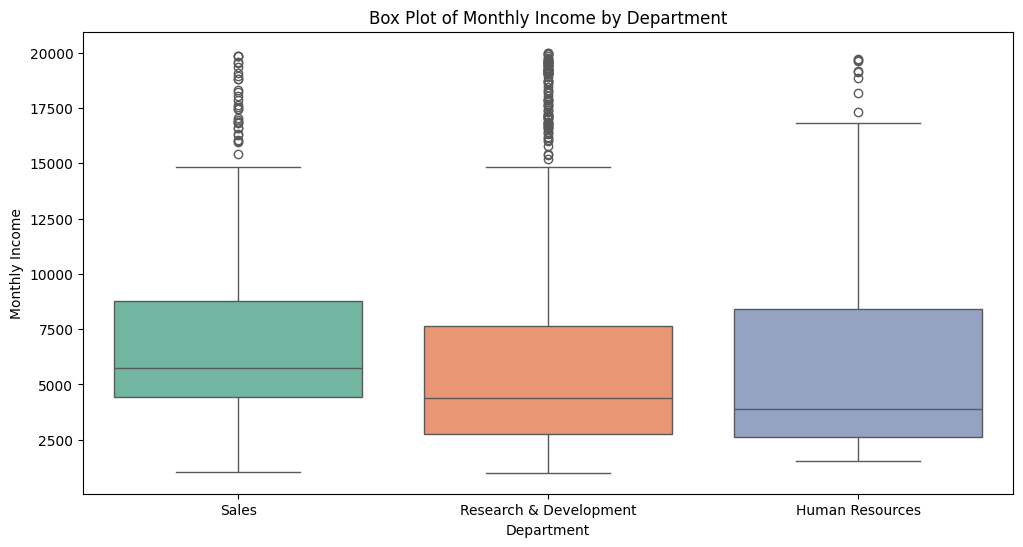

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2')
plt.title('Box Plot of Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

- There is no significant difference in the median monthly income across the three departments.
- The distributions are generally similar, with a few outliers in each department.
- The interquartile ranges are also similar, indicating similar variability in monthly income within each department.

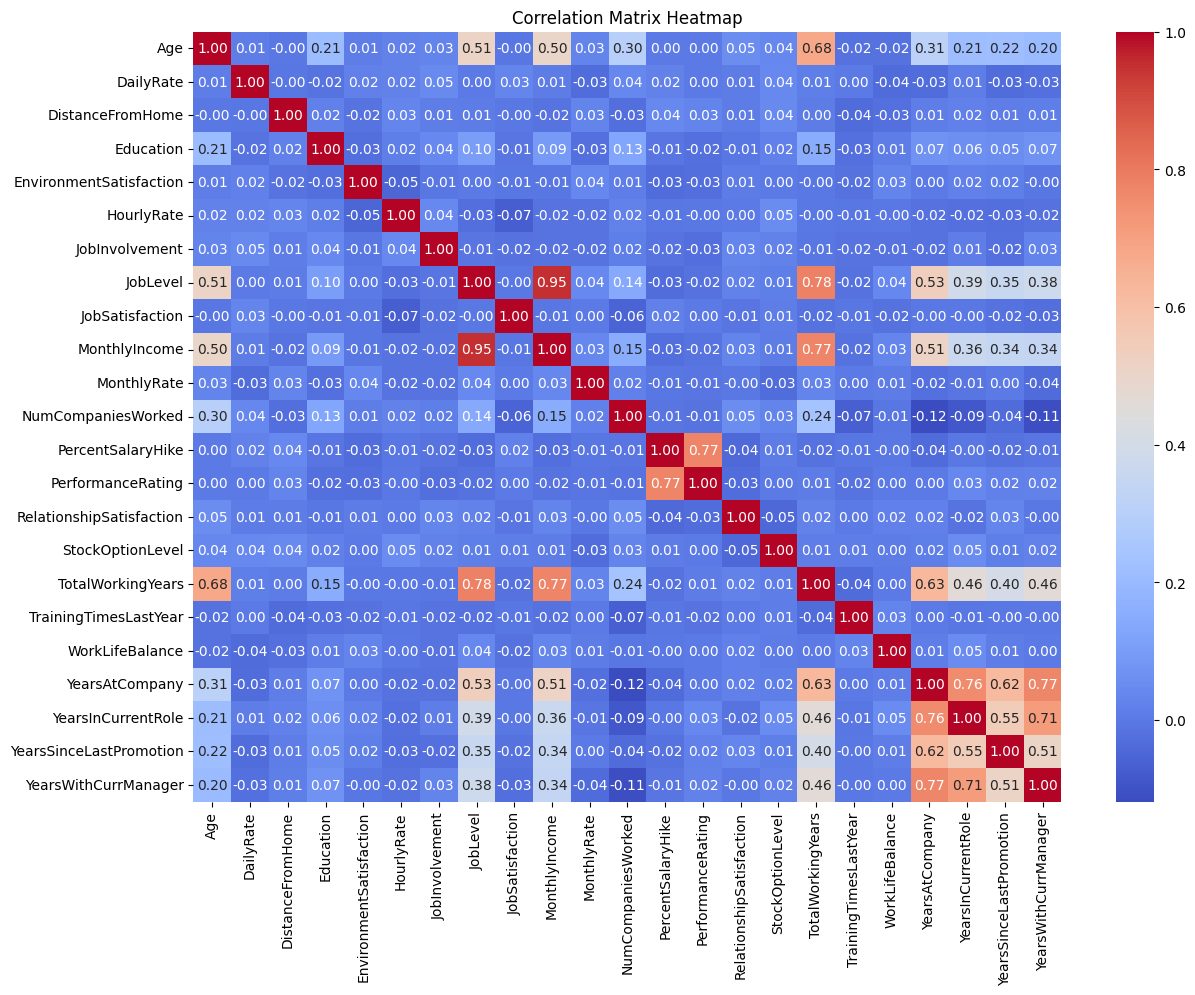

In [85]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Strong Correlations:

- JobLevel and MonthlyIncome, TotalWorkingYears
- JobLevel and YearsAtCompany
- MonthlyIncome and TotalWorkingYears
- YearsAtCompany and YearsInCurrentRole
- YearsAtCompany and YearsSinceLastPromotion
- YearsInCurrentRole and YearsWithCurrManager
- JobSatisfaction and JobLevel
- JobSatisfaction and MonthlyIncome
- JobSatisfaction and TotalWorkingYears
- JobSatisfaction and YearsAtCompany
- JobSatisfaction and YearsInCurrentRole
- JobSatisfaction and YearsSinceLastPromotion
- JobSatisfaction and YearsWithCurrManager

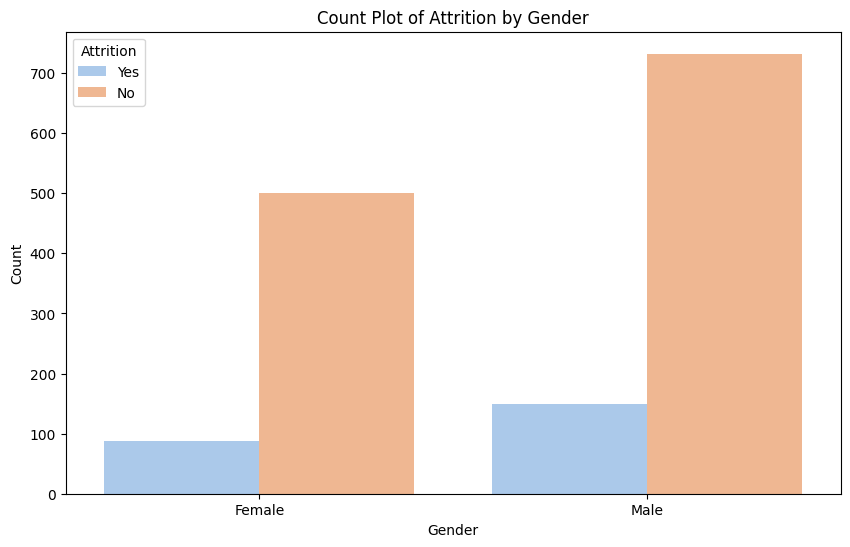

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel')
plt.title('Count Plot of Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

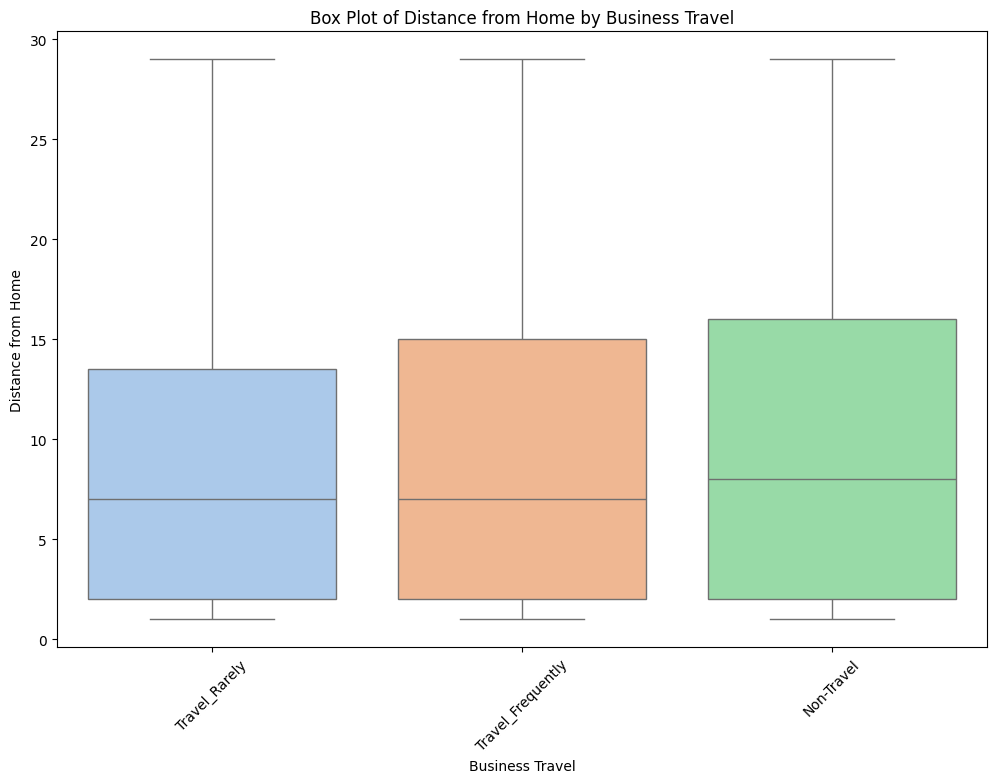

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='BusinessTravel', y='DistanceFromHome', palette='pastel')
plt.title('Box Plot of Distance from Home by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Distance from Home')
plt.xticks(rotation=45)
plt.show()

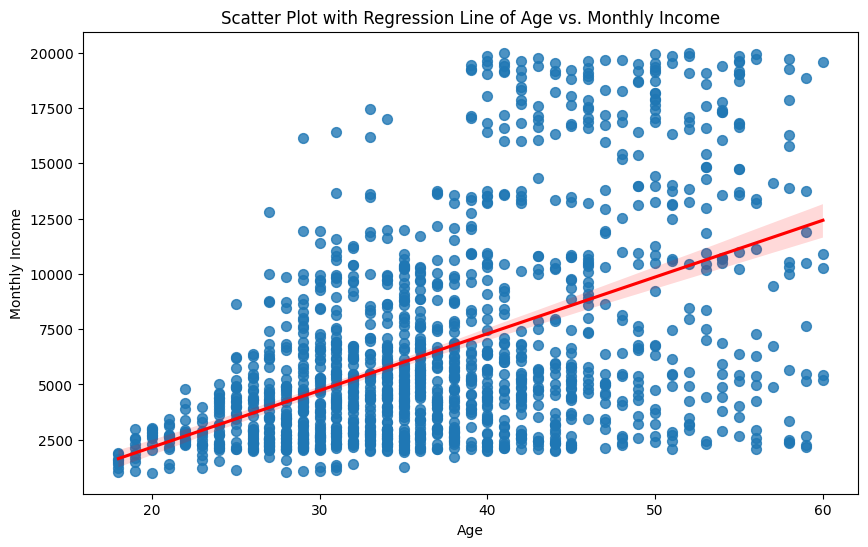

In [88]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='MonthlyIncome', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line of Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()


<Figure size 1200x1000 with 0 Axes>

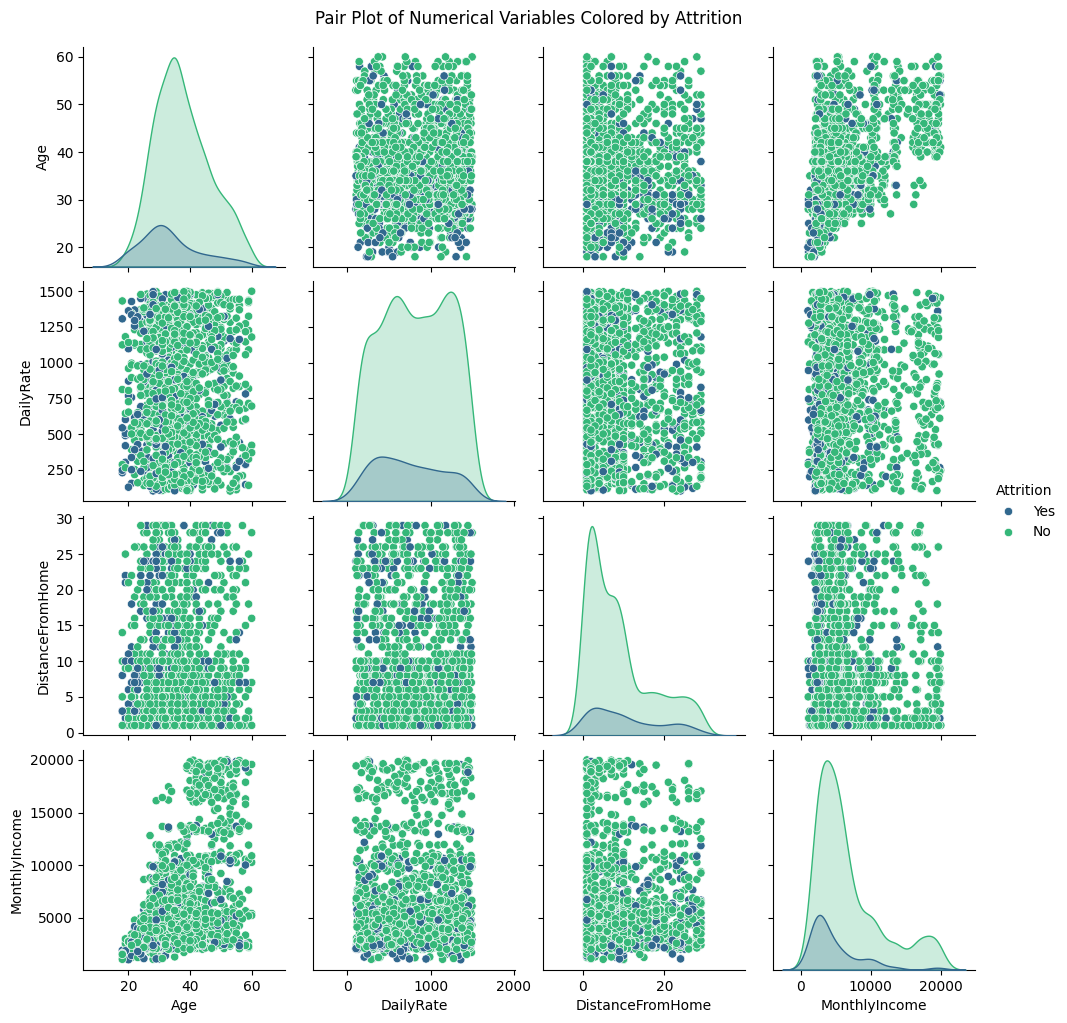

In [89]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='Attrition', vars=['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome'], palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables Colored by Attrition', y=1.02)
plt.show()

Relationships between Numerical Variables:

- Age and MonthlyIncome: There is a weak positive correlation between age and monthly income, suggesting that older employees tend to earn more.
- DailyRate and MonthlyIncome: There is a weak positive correlation between daily rate and monthly income, indicating that higher daily rates are associated with higher monthly income.
- DistanceFromHome and MonthlyIncome: There is no apparent correlation between distance from home and monthly income.
- DistanceFromHome and DailyRate: There is a slight negative correlation between distance from home and daily rate, suggesting that employees living closer to work might have slightly lower daily rates.
- Age and DailyRate: There is no apparent correlation between age and daily rate.

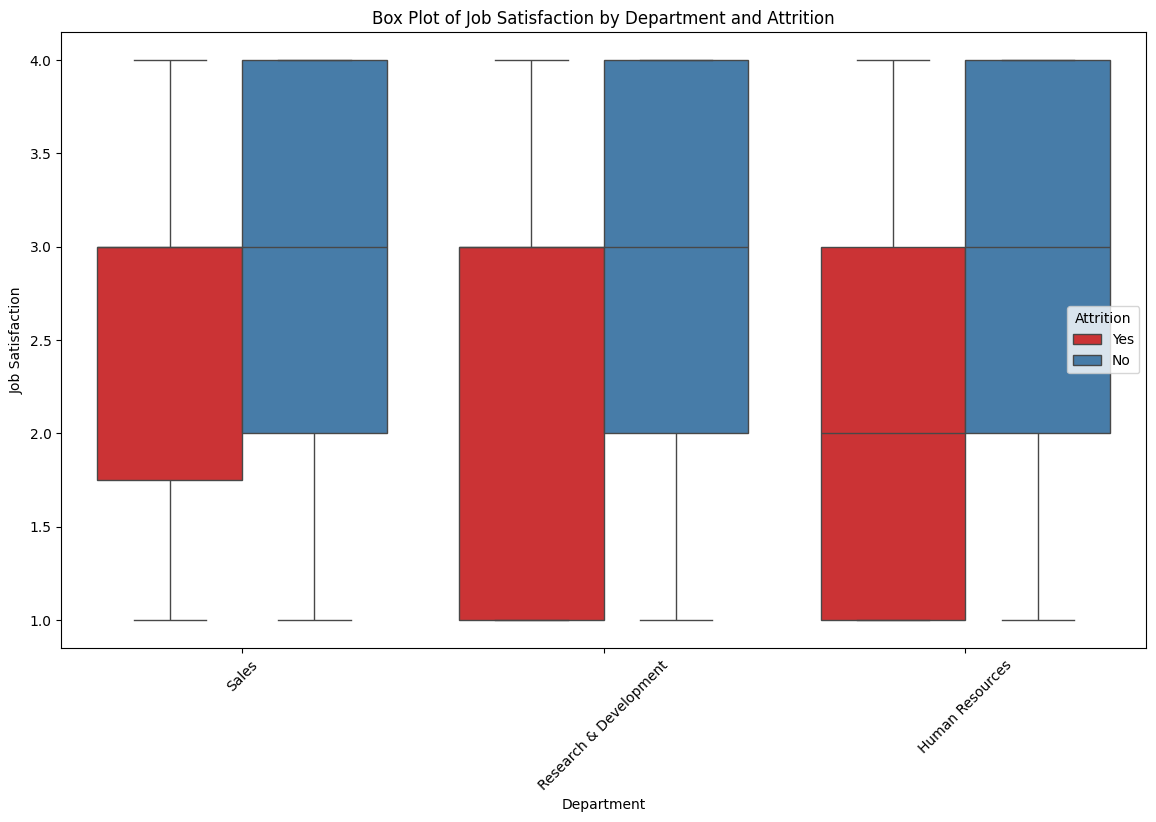

In [90]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Department', y='JobSatisfaction', hue='Attrition', palette='Set1')
plt.title('Box Plot of Job Satisfaction by Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

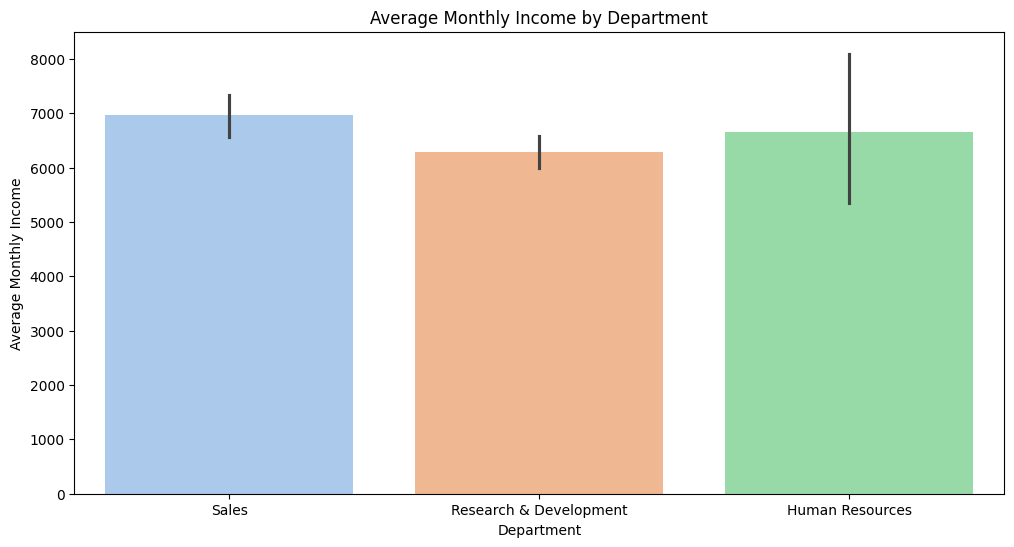

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Department', y='MonthlyIncome', estimator='mean', palette='pastel')
plt.title('Average Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')  # Rotate x labels for better readability
plt.show()

<Figure size 1000x800 with 0 Axes>

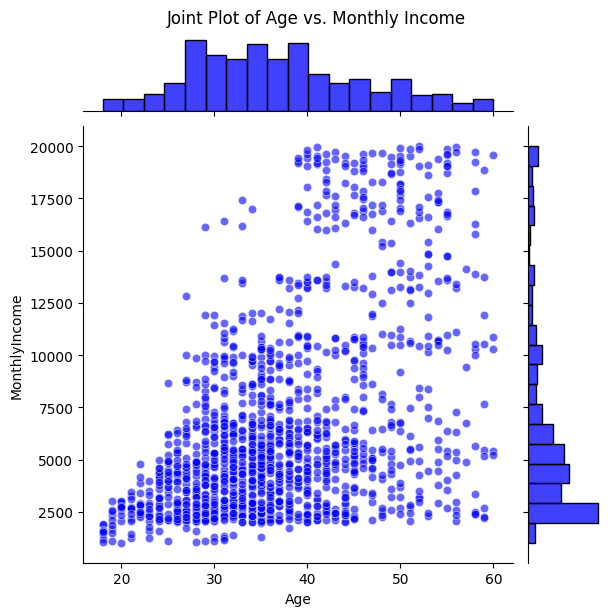

In [92]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='Age', y='MonthlyIncome', kind='scatter', color='b', alpha=0.6)
plt.suptitle('Joint Plot of Age vs. Monthly Income', y=1.02)
plt.show()


<Figure size 1000x800 with 0 Axes>

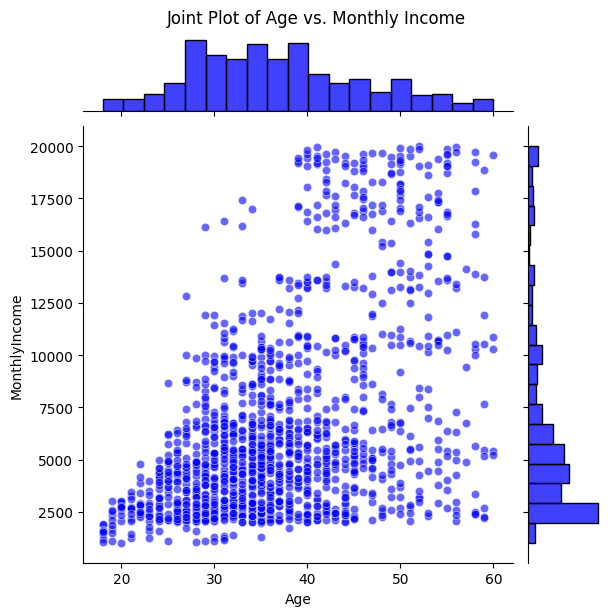

In [93]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='Age', y='MonthlyIncome', kind='scatter', color='b', alpha=0.6)
plt.suptitle('Joint Plot of Age vs. Monthly Income', y=1.02)
plt.show()


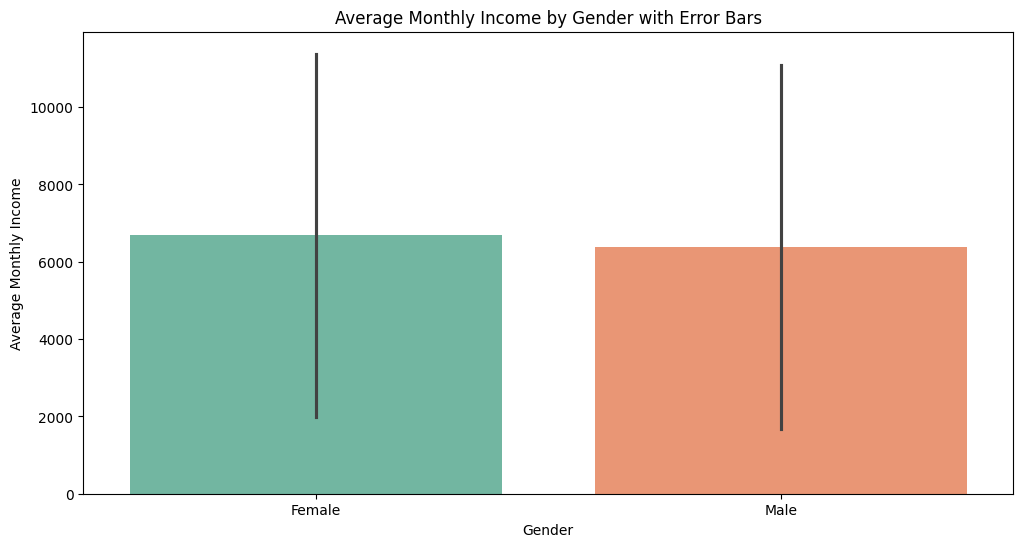

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='MonthlyIncome', estimator='mean', ci='sd', palette='Set2')
plt.title('Average Monthly Income by Gender with Error Bars')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Income')
plt.show()

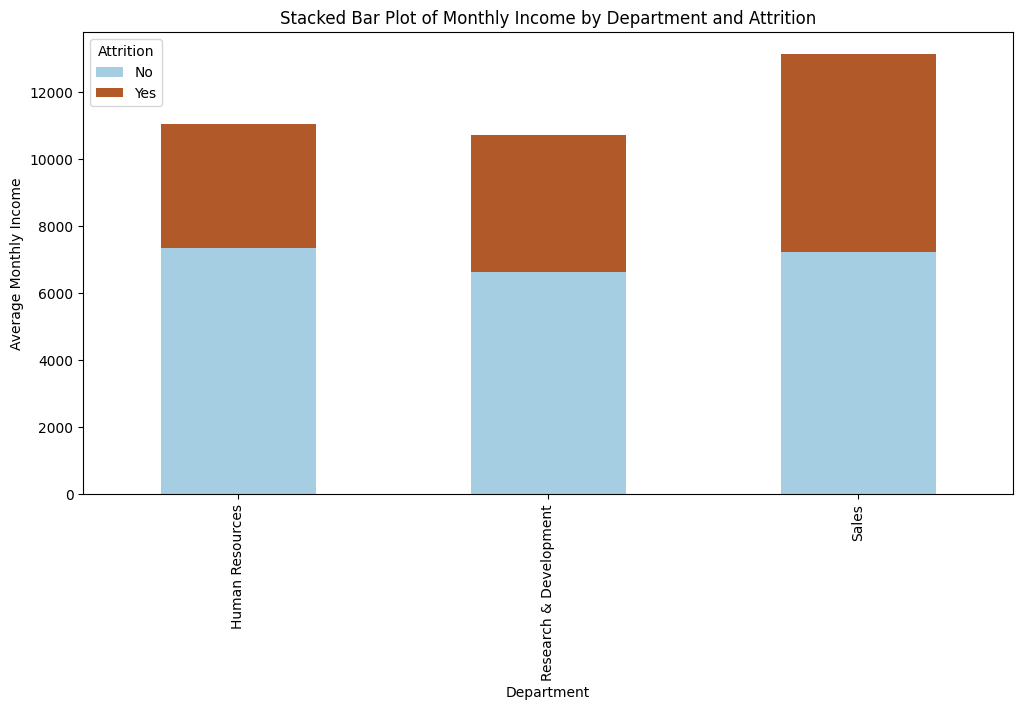

In [95]:
pivot_table = df.pivot_table(index='Department', columns='Attrition', values='MonthlyIncome', aggfunc='mean')
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Stacked Bar Plot of Monthly Income by Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.show()

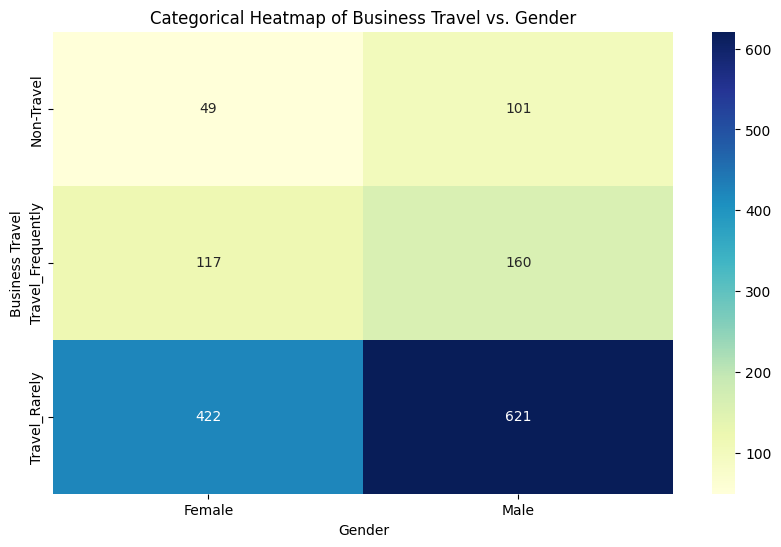

In [96]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['BusinessTravel'], df['Gender'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Categorical Heatmap of Business Travel vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Business Travel')
plt.show()

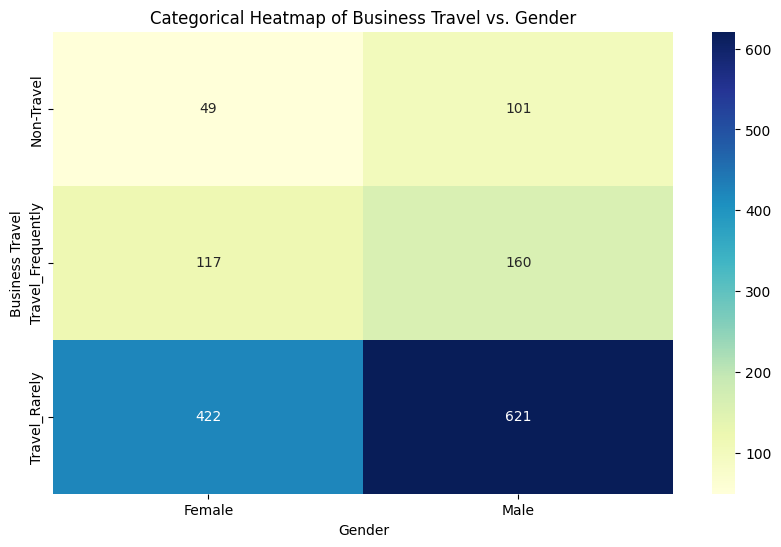

In [97]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['BusinessTravel'], df['Gender'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Categorical Heatmap of Business Travel vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Business Travel')
plt.show()

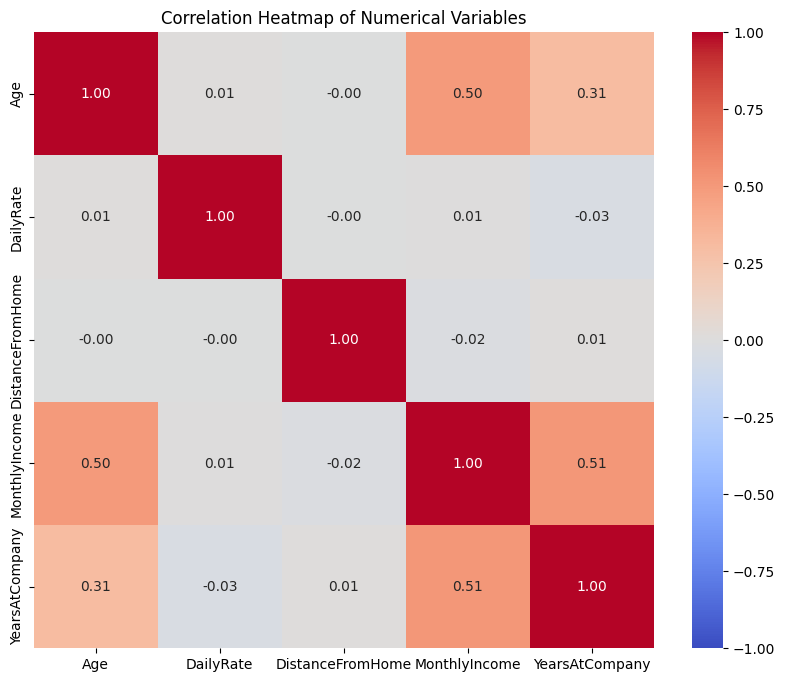

In [98]:
corr_matrix = df[['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [99]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x='Age', y='MonthlyIncome', color='Department', hover_data=['JobSatisfaction'])
fig.update_layout(title='Interactive Scatter Plot of Age vs. Monthly Income',
                  xaxis_title='Age',
                  yaxis_title='Monthly Income')
fig.show()

- There is a general positive correlation between age and monthly income, meaning that as age increases, monthly income tends to increase as well. However, this relationship is not perfectly linear, and there is some variation around the trend.

# Chi Square to test the correlation

In [100]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Department'], df['Attrition'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")


Chi-Square Statistic: 10.79600732241067
P-Value: 0.004525606574479633
Degrees of Freedom: 2
Expected Frequencies Table:
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]


This value measures the discrepancy between the observed and expected frequencies in the contingency table.
#### P-Value: 0.0045

This p-value is less than the common significance level of 0.05, indicating that there is a statistically significant association between Department and Attrition. In other words, the distribution of attrition is not independent of the department.

# Spearman

In [101]:
from scipy.stats import spearmanr

rho, p_val = spearmanr(df['Age'], df['MonthlyIncome'])
print(f"Spearman's Rank Correlation Coefficient: {rho}")
print(f"P-Value: {p_val}")


Spearman's Rank Correlation Coefficient: 0.47190213023271405
P-Value: 2.1834560926451124e-82


This value suggests a moderate positive correlation between Age and MonthlyIncome. A coefficient of 0.472 indicates that as Age increases, MonthlyIncome tends to increase as well

for this P-Value it's extremely small p-value indicates that the observed correlation is highly statistically significant. Given that this p-value is much less than the typical significance level of 0.05, we can reject the null hypothesis that there is no correlation between Age and MonthlyIncome.

### Interpretation
#### Strength of Correlation:

A Spearman's rank correlation coefficient of 0.472 suggests a moderate positive relationship between the two variables. This implies that as individuals' age increases, their monthly income tends to increase as well, although not perfectly.
Statistical Significance:

The p-value being significantly less than 0.05 confirms that the correlation observed is unlikely to be due to chance. This strong statistical significance suggests that the relationship between Age and MonthlyIncome is robust.

## 2.3 Multivariate Analysis

### 2.3.1 How monthly income is varying between different roles grouped by employeee attrition

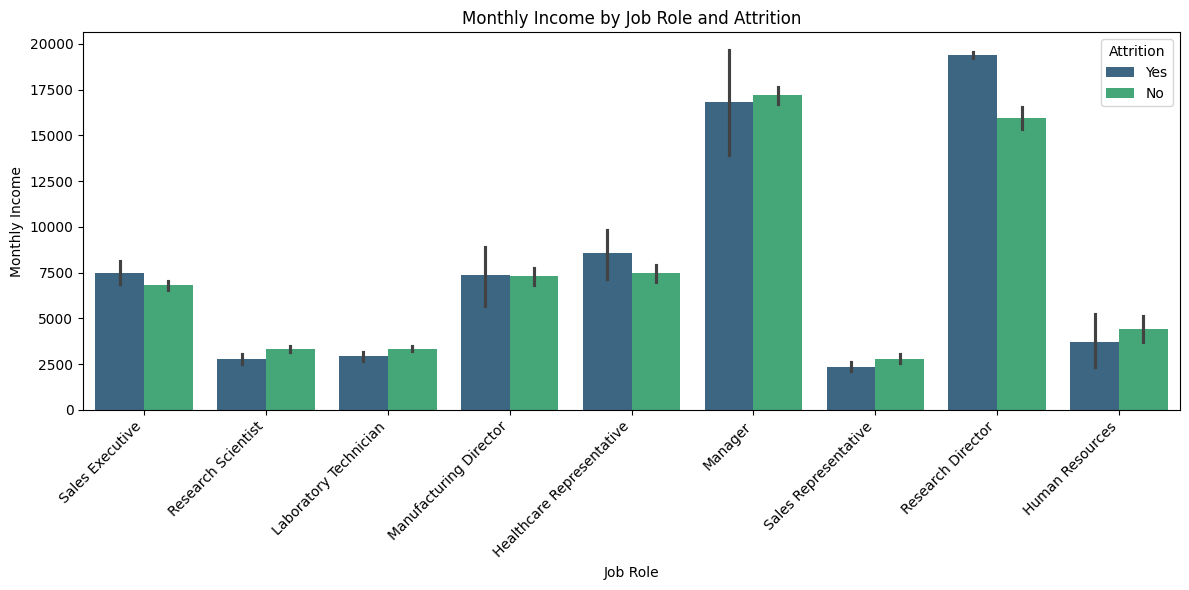

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='MonthlyIncome', hue='Attrition', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Monthly Income by Job Role and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')

plt.tight_layout()
plt.show()

#### Insights and Business solutions
- Managers, Research Directors, and Sales Executives have the highest monthly incomes, regardless of attrition,
- Only research directors has a signigifacnt difference between both attrition groups.
- Consider retention strategies for higher-income roles like Managers and Sales Executives.

### 2.3.2 Compare Different job levels between males and females, and see the attrition of both

In [103]:
df_copy = df.copy()
df_copy['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(
    {1: 'Entry level', 2: 'Mid level', 3: 'Senior', 4: 'Lead', 5: 'Executive'})
px.sunburst(df_copy, path=['Gender', 'JobLevel', 'Attrition'], height=650).update_traces(textinfo="label+percent parent")


#### Insights and Business solutions
- Entry-level positions are the most common for both genders, but especially for males (39% vs. 34% for females).
- Females have a slightly higher representation at the Senior level (16%) compared to males (14%).
- The Lead and Executive levels have very few employees.
- Encourage gender diversity in higher job levels like Lead and Executive.

### 2.3.3 Compare attrition in different job roles

In [104]:
px.sunburst(df, path=['JobRole', 'Attrition'], height=650).update_traces(textinfo="label+percent parent")

### 2.3.5 Attrition by joblevel and marital status

In [105]:
df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

# Count job levels
plot_df = df.groupby(['JobLevel', 'MaritalStatus']).size().reset_index(name='Count')

fig = px.bar(plot_df, x='JobLevel', y='Count', color='MaritalStatus',
             barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel,
             labels={'JobLevel': 'Job Level', 'Count': 'The number of employees'},
             title='Distribution of Attrition by Job Level')

fig.show()



#### Insights and Business Solutions
- Divorced seems to be the least frequent class of all, except for executive, indicating high age probably
- Married is the biggest class overall, most of them are Midlevel or entries
- Single employees represent a big proportion in entry level, also might be for age reasons let's investigate that

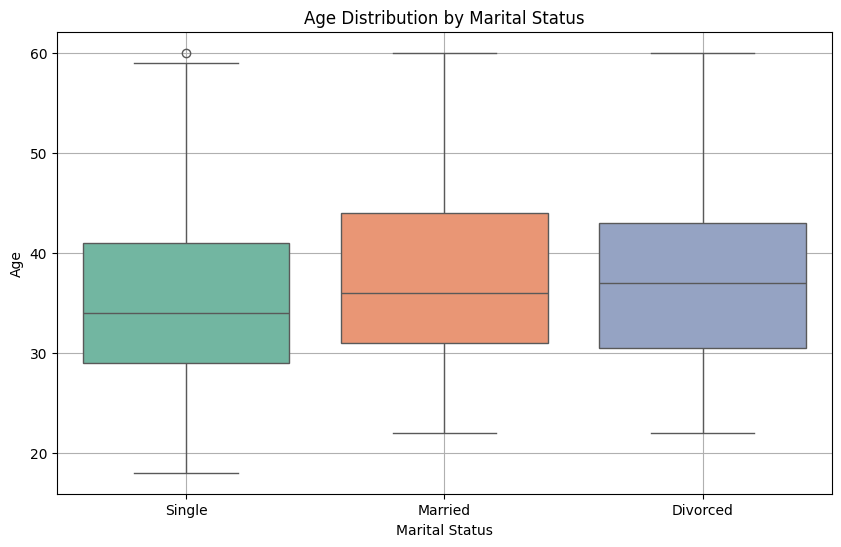

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MaritalStatus', y='Age', palette='Set2')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [107]:
fig = px.bar(df, x='EducationField', y='MonthlyIncome', color='JobRole', barmode='group')
fig.update_layout(

xaxis_title='Education Field',

yaxis_title='MonthlyIncome',

title='Job Satisfaction by Education Field and Job Role')

#### Observations:
- Marketing education field has a lot of sales executives, and generally it's the most frequent job role in the data, and they are having high income
- Sales executives high income might be because they are working in a commision-based compensation system
- Since the company is working in the Life Sciences field, it's having a lot of healhcare representatives\ lab technician \ research scientests
- The company doesn't need to have a lot of HR employees

In [108]:
plot_df=df.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition',
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#495159','No': '#A1E8CC'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D', plot_bgcolor='#ffffff', legend_traceorder='reversed')
fig.show()

#### Insights and Business Solutions
- Distribution for income in a no attrition employees is much higher indicating that they are having more income than those who left(median 5000 vs 3000)
- in a no attrition class, there exists a lot of outliers, most of the outliers actually for the monthly income feature, both with a maximum of 19K

### 2.3.6  Age Analysis

In [109]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [110]:
fig = px.box(
    df,
    x='Gender',
    y='Age',
    color='Attrition',
    color_discrete_map={'Yes': '#A23B1F', 'No': '#003EBF'},
    height=700
)
fig.show()

- We can notice that employees in the late 30th and below leaves more
- The Disribution for Leaving by gender as approximately the same compared with Age

In [111]:
fig = px.violin(
    df,
    x='JobSatisfaction',
    y='Age',
    color='Attrition',
    box=True,
    points='all',
    title='Age vs Job Satisfaction grouped by Attrition'
)
fig.show()

We can still notice that age of 30's is still the deciding factor for attrition, even in differient levels of job satisfaction

In [112]:
fig = px.histogram(
    df,
    x='Age',
    color='OverTime',
    facet_col='Department',
    title='Age Distribution across Overtime Status and Department'
)
fig.show()

Since R&D Department contains the highest number of employees, we find that distribution shows high number of employees that doesn't work overtime, but a small proportion works overtime and most of them are in the age of 30's.

In [113]:
fig = px.box(
    df,
    x='Attrition',
    y='DistanceFromHome',
    color='Attrition',
    title='Distance from Home by Attrition and Age',
    labels={'Age': 'Age', 'DistanceFromHome': 'Distance from Home'},
    points='all',
    height=600
)
fig.show()


- Employees who left the company (Attrition = Yes) tend to have a slightly higher median distance from home compared to those who stayed (Attrition = No).
- Distance from Home may have some impact on employee retention, with those living farther away being slightly more prone to leaving.

### T-test for income between current and former employees

**T-test is often used to determine whether the population means for two groups are different**

We performed a t-test to compare the mean monthly income between employees who have left the company (Attrition = "Yes") and those who are still employed (Attrition = "No"). This test was chosen because we wanted to determine if there is a statistically significant difference in income between the two groups.
- The null hypothesis (H₀) is Independence (No difference).
- The alternative hypothesis (H₁) is Dependence (there is a difference).

In [114]:
df_t_test = df.copy()

df_t_test['MonthlyIncome'] = np.log(df_t_test['MonthlyIncome'] + 1) # Log to assume normality in data

group1 = df_t_test['MonthlyIncome'][df_t_test['Attrition'] == 'Yes']  # Former Employees
group2 = df_t_test['MonthlyIncome'][df_t_test['Attrition'] == 'No']   # Current Employees

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-test Results:
T-statistic: -7.857595795551093
P-value: 5.2946255743772566e-14


- Since the p-value (5.29e-43) is smaller than 0.05, We reject the null hypothesis.
- This means there is difference in mean MonthlyIncome between former employees and current employees.

**Additional Test:** we already know that there is no significant difference between male's income and female's income in the company, to validate more let's make a t-test


- The null hypothesis (H₀) is Independence (No difference).
- The alternative hypothesis (H₁) is Dependence (there is a difference).

In [115]:
group1 = df_t_test['MonthlyIncome'][df_t_test['Gender'] == 'Male']  # Male Employees
group2 = df_t_test['MonthlyIncome'][df_t_test['Gender'] == 'Female']   # Female Employees

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-test Results:
T-statistic: -1.7006812847298436
P-value: 0.08924656463970011


| **Insight**                                                                                                                                       | **Business Solutions**                                                                                                          |
|---------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| Managers, Research Directors, and Sales Executives have the highest monthly incomes, regardless of attrition.                                      | Focus on retention strategies for high-income roles to maintain top talent and reduce costs associated with turnover.                 |
| Entry-level positions are the most common for both genders, but especially for males (39% vs. 34% for females).                                    | Promote diversity in recruitment and create pathways for females to enter entry-level roles more frequently.                         |
| Females have a slightly higher representation at the Senior level (16%) compared to males (14%).                                                   | Encourage and support career progression for females, potentially increasing their representation at higher job levels.             |
| The Lead and Executive levels have very few employees.                                                                                             | Implement targeted development programs to prepare and promote internal candidates for Lead and Executive roles.                     |
| Divorced employees are the least frequent in most job roles, indicating they might be older.                                                       | Consider tailored support and retention strategies for older emerience.                          |
| Married employees are the largest group overall, particularly at mid-level and entry-level positions.                                              | Focus on family-friendly policies and benefits to retain married employees, especially those in critical mid-level roles.                |
| Income distribution for non-attrition employees is higher, with a median of 5000 vs. 3000 for those who left.                                      | Consider compensation adjustments to retain employees, ensuring competitive pay to prevent attrition.                    disparities.|
| Employees in their late 30s and younger are more likely to leave.                                                                                  | Develop targeted retention strategies for younger employees, such as career advancement opportunities and flexible work options.     |
| The distribution of attrition by gender is similar across different ages, but the 30s remain a critical factor.                                    | Address the specific needs and concerns of employees in their 30s to reduce attrition, possibly through work-life balance initiatives.|
| The R&D Department has a high number of employees not working overtime, with a smaller proportion in their 30s working overtime.                   | Promote work-life balance in the R&D department to retain talent while ensuring productivity remains high.                           |
| Employees who left the company tend to have a slightly higher median distance from home compared to those who stayed.                              | Consider the impact of commute distances in retention strategies, potentially offering remote work options or relocation assistance. |
| Distance from Home may impact employee retention, with those living farther away being more prone to leaving.                                      | Use this insight to offer flexible working arrangements or incentives to employees who live further away.                            |
| There is a difference in mean MonthlyIncome between former employees and current employees.                                                        | Ensure that compensation practices are competitive and fair, addressing any pay gaps that may contribute to attrition.               |


| **Feature**                 | **Insight**                                                      | **Suggestion**                                                                                   |
|-----------------------------|------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Marital Status (IsMarried)** | Married employees are a lot in mid-level and entry-level roles.      | Create binary feature `IsMarried`           |
| **Loyalty**                 | Higher tenure ratio indicates more loyalty.                      | Calculate `Loyalty` as `YearsAtCompany / TotalWorkingYears`       |
| **Years Between Promotions (YearsBetweenPromotion)** | Promotion frequency influences job satisfaction and retention. | Calculate `YearsBetweenPromotion` as `YearsAtCompany - YearsSinceLastPromotion`.                |
| **Salary Growth (SalaryGrowth)** | Income growth increases retention rates.       | Calculate `SalaryGrowth` as `MonthlyIncome / (PercentSalaryHike + 1)`.                          |
| **Distance Compensation (DistanceCompensation)** | Commute distance may impact retention.                        | Calculate `DistanceCompensation` as `MonthlyIncome / DistanceFromHome`.                         |
| **Role Stability (RoleStability)** | Stability in current role correlates with job satisfaction.     | Compute `RoleStability` as `YearsInCurrentRole / YearsAtCompany`.  |
| **Total Satisfaction (TotalSatisfaction)** | Overall satisfaction includes multiple metrics.                |  `TotalSatisfaction` is the average of `JobSatisfaction`, `EnvironmentSatisfaction`, `RelationshipSatisfaction`, and `WorkLifeBalance`. |

# 3. Data Preprocessing
In this section, we will prepare the data for our classification model by creating new features, applying transformation methods to address outliers, and encoding categorical data.
# 3.1 Feature Engineering
We are creating new features by combining or transforming existing ones to capture underlying relationships or patterns

In [116]:
df_feat = df.copy()
df_feat['IsMarried'] = df_feat['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 0)
df_feat['Loyalty'] = df_feat['YearsAtCompany'] / df_feat['TotalWorkingYears'].replace(0, 1)
df_feat['YearsBetweenPromotion'] = df_feat['YearsAtCompany'] - df_feat['YearsSinceLastPromotion']
df_feat['SalaryGrowth'] = df_feat['MonthlyIncome'] / (df_feat['PercentSalaryHike'] + 1)
df_feat['DistanceCompensation'] = df_feat['MonthlyIncome'] / df_feat['DistanceFromHome']
df_feat['RoleStability'] = df_feat['YearsInCurrentRole'] / df_feat['YearsAtCompany']
df_feat['RoleStability'].fillna((df_feat['RoleStability'].mean()), inplace=True)
df_feat['TotalSatisfaction'] = (df_feat['JobSatisfaction'] + df_feat['EnvironmentSatisfaction'] +
                          df_feat['RelationshipSatisfaction'] + df_feat['WorkLifeBalance']) / 4

### 3.1.1 New Features:
- `IsMarried`: A binary indicator variable (0 or 1) indicating whether the employee is married.
- `Loyalty`: Calculates the proportion of an employee's tenure spent at the current company.
- `YearsBetweenPromotion`: Determines the number of years since the employee's last promotion.
- `SalaryGrowth`: Measures the annual percentage increase in the employee's monthly income.
- `DistanceCompensation`: Evaluates the potential compensation for the distance from home.
- `RoleStability`: Calculates the proportion of an employee's tenure spent in their current role.
- `TotalSatisfaction`: Computes an average satisfaction score based on job, environment, relationship, and work-life balance satisfaction ratings.

# 3.2 Data Transformation
We notices the presence of outliers in our data, we can't really drop these outliers or we are going to lose many of our rows, so instead, we can apply BoxCox Transformation on columns that has outliers to try to reduce the negative effect of outliers.

In [117]:
columns = [
    'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

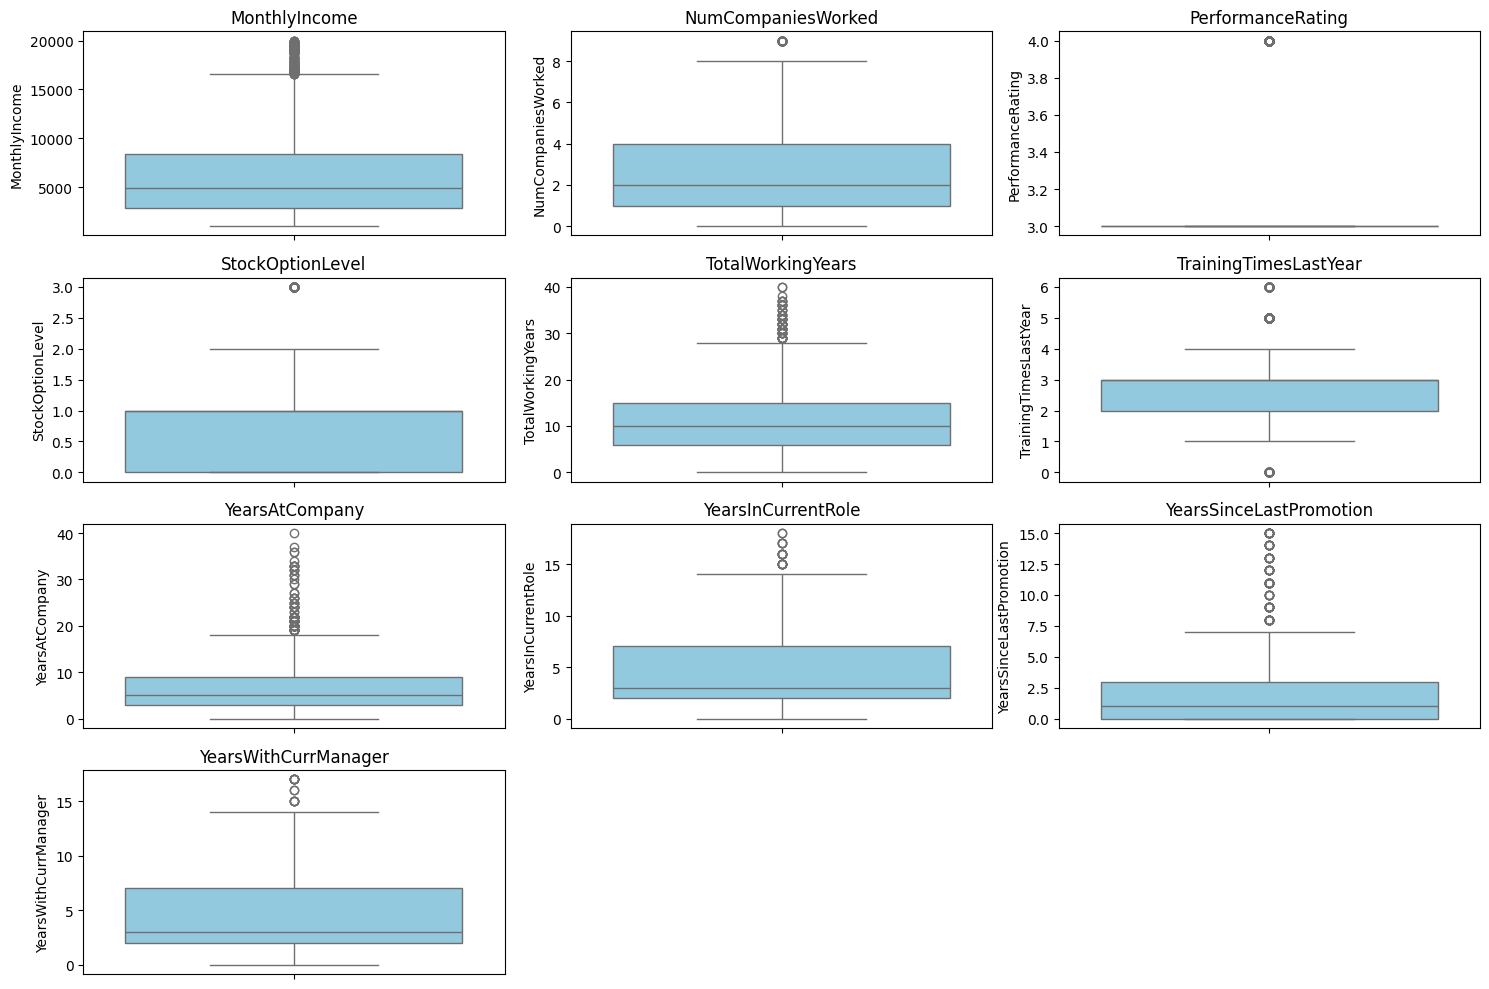

In [118]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


### 3.2.1 Applying BoxCox Transformation

In [119]:
df = df_feat.copy()
from scipy.stats import boxcox
for col in columns:
    df[col] = df[col].apply(lambda x: x + 1 if x <= 0 else x)
    df[col], _ = boxcox(df[col])

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement     JobLevel                JobRole  \
0  Female          94               3    Mid level        Sales Executive   
1    Male          61               2    Mid level     Research Scientist   
2    Male          92               2  Entry level  Laboratory Technician   
3  Female          56               3  Entry level     Research Scientist   
4    Male          40               3  Entry level  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single       4.080042        19479   
1                2       Married       4.053084        24907   
2                3        Single       3.879569         2396   
3                3       Married       3.947172        23159   
4                2       Married       3.981302        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0            1.239178      Yes                 11            0.04469   
1            0.000000       No                 23            0.04469   
2            1.139798      Yes                 15            0.04469   
3            0.000000      Yes                 11            0.04469   
4            1.275544       No                 12            0.04469   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1               0.0           3.094754   
1                         4               0.0           3.586015   
2                         2               0.0           2.819109   
3                         3               0.0           3.094754   
4                         4               0.0           2.516952   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               0.000000                1        2.035850            1.362236   
1               1.230102                3        2.715871            1.898730   
2               1.230102                3        0.000000            0.000000   
3               1.230102                3        2.412843            1.898730   
4               1.230102                3        0.727804            0.687097   

   YearsSinceLastPromotion  YearsWithCurrManager  IsMarried   Loyalty  \
0                 0.000000              1.569461          0  0.750000   
1                 0.000000              1.887674          1  1.000000   
2                 0.000000              0.000000          0  0.000000   
3                 0.575185              0.000000          1  1.000000   
4                 0.451552              0.685661          1  0.333333   

   YearsBetweenPromotion  SalaryGrowth  DistanceCompensation  RoleStability  \
0                      6    499.416667           5993.000000       0.666667   
1                      9    213.750000            641.250000       0.700000   
2                      0    130.625000           1045.000000       0.596061   
3                      5    242.416667            969.666667       0.875000   
4                      0    266.769231           1734.000000       1.000000   

   TotalSatisfaction  

In [120]:
df.shape

(1470, 38)

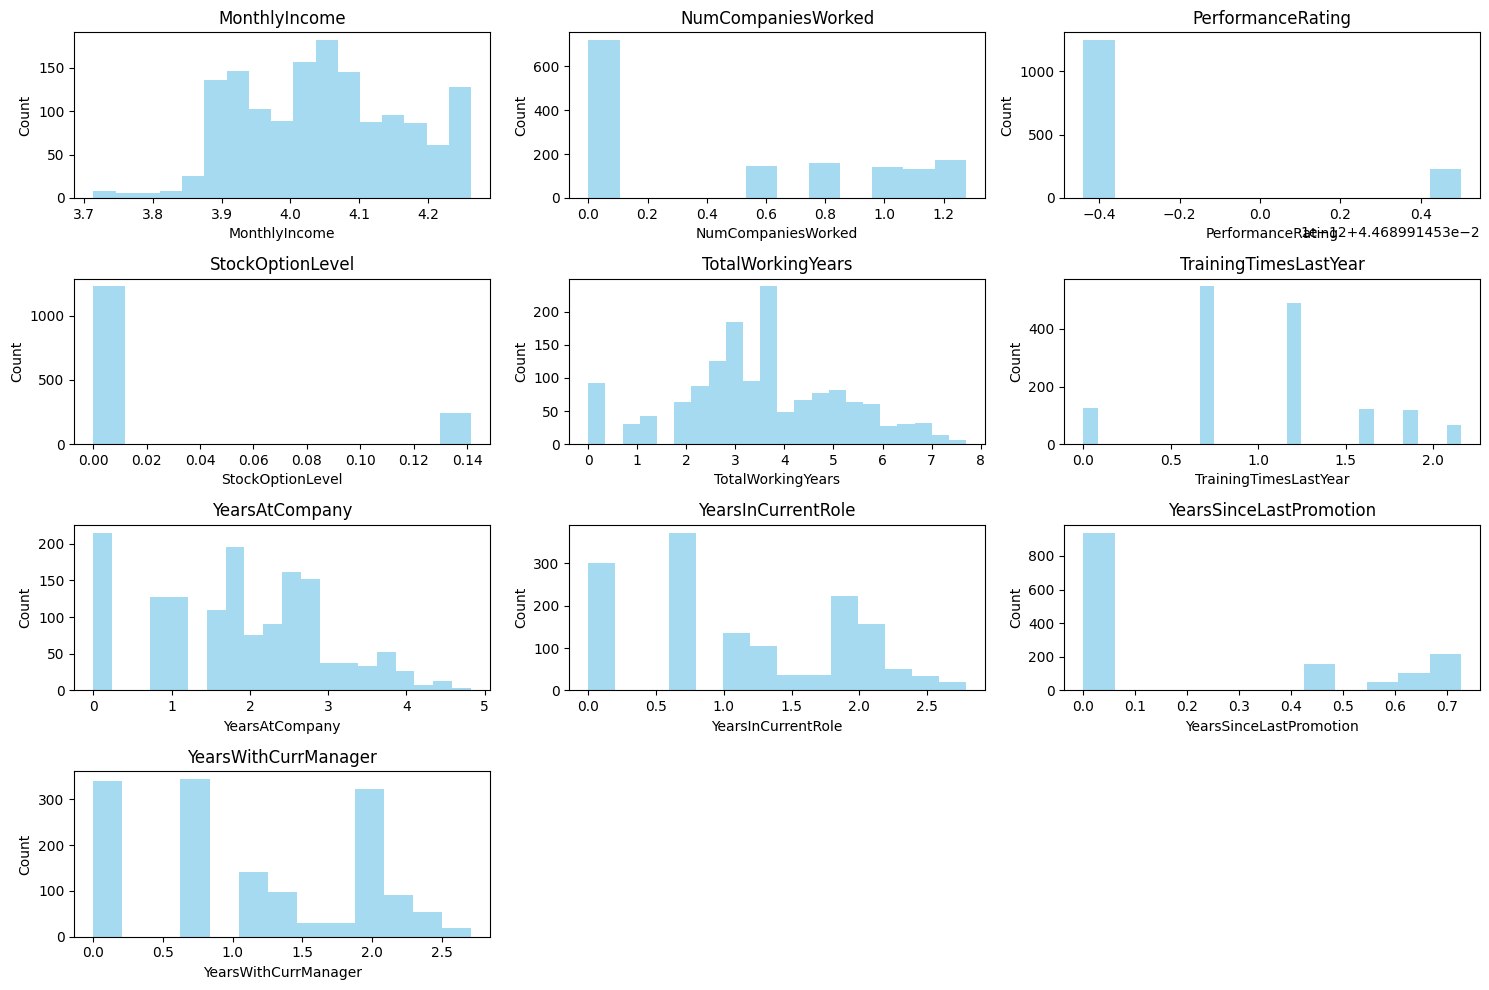

In [121]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=df[col],color="skyblue",edgecolor="None")
    plt.title(col)

plt.tight_layout()
plt.show()


## 3.3 Feature Encoding

We have multiple categorical features in our data that need to be converted to numerical values for compatibility with classification models.

### 3.3.1 Label Encoding

For binary features, we'll employ label encoding to directly map binary values to numerical.

In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement     JobLevel                JobRole  \
0       0          94               3    Mid level        Sales Executive   
1       1          61               2    Mid level     Research Scientist   
2       1          92               2  Entry level  Laboratory Technician   
3       0          56               3  Entry level     Research Scientist   
4       1          40               3  Entry level  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single       4.080042        19479   
1                2       Married       4.053084        24907   
2                3        Single       3.879569         2396   
3                3       Married       3.947172        23159   
4                2       Married       3.981302        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0            1.239178         1                 11            0.04469   
1            0.000000         0                 23            0.04469   
2            1.139798         1                 15            0.04469   
3            0.000000         1                 11            0.04469   
4            1.275544         0                 12            0.04469   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1               0.0           3.094754   
1                         4               0.0           3.586015   
2                         2               0.0           2.819109   
3                         3               0.0           3.094754   
4                         4               0.0           2.516952   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               0.000000                1        2.035850            1.362236   
1               1.230102                3        2.715871            1.898730   
2               1.230102                3        0.000000            0.000000   
3               1.230102                3        2.412843            1.898730   
4               1.230102                3        0.727804            0.687097   

   YearsSinceLastPromotion  YearsWithCurrManager  IsMarried   Loyalty  \
0                 0.000000              1.569461          0  0.750000   
1                 0.000000              1.887674          1  1.000000   
2                 0.000000              0.000000          0  0.000000   
3                 0.575185              0.000000          1  1.000000   
4                 0.451552              0.685661          1  0.333333   

   YearsBetweenPromotion  SalaryGrowth  DistanceCompensation  RoleStability  \
0                      6    499.416667           5993.000000       0.666667   
1                      9    213.750000            641.250000       0.700000   
2                      0    130.625000           1045.000000       0.596061   
3                      5    242.416667            969.666667       0.875000   
4                      0    266.769231           1734.000000       1.000000   

   TotalSatisfac

In [123]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


### 3.3.2 One-Hot Encoding

For Nominal features, we'll use one-hot encoder

In [124]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]),
                            columns=encoder.get_feature_names_out(columns_to_encode))

df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_data], axis=1)

df_encoded.head()

Age Attrition  DailyRate  DistanceFromHome  Education  \
0   41       Yes       1102                 1          2   
1   49        No        279                 8          1   
2   37       Yes       1373                 2          2   
3   33        No       1392                 3          4   
4   27        No        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement     JobLevel  \
0                        2       0          94               3    Mid level   
1                        3       1          61               2    Mid level   
2                        4       1          92               2  Entry level   
3                        4       0          56               3  Entry level   
4                        1       1          40               3  Entry level   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4       4.080042        19479            1.239178         1   
1                2       4.053084        24907            0.000000         0   
2                3       3.879569         2396            1.139798         1   
3                3       3.947172        23159            0.000000         1   
4                2       3.981302        16632            1.275544         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11            0.04469                         1   
1                 23            0.04469                         4   
2                 15            0.04469                         2   
3                 11            0.04469                         3   
4                 12            0.04469                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0               0.0           3.094754               0.000000   
1               0.0           3.586015               1.230102   
2               0.0           2.819109               1.230102   
3               0.0           3.094754               1.230102   
4               0.0           2.516952               1.230102   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1        2.035850            1.362236   
1                3        2.715871            1.898730   
2                3        0.000000            0.000000   
3                3        2.412843            1.898730   
4                3        0.727804            0.687097   

   YearsSinceLastPromotion  YearsWithCurrManager  IsMarried   Loyalty  \
0                 0.000000              1.569461          0  0.750000   
1                 0.000000              1.887674          1  1.000000   
2                 0.000000              0.000000          0  0.000000   
3                 0.575185              0.000000          1  1.000000   
4                 0.451552              0.685661          1  0.333333   

   YearsBetweenPromotion  SalaryGrowth  DistanceCompensation  RoleStability  \
0                      6    499.416667           5993.000000       0.666667   
1                      9    213.750000            641.250000       0.700000   
2                      0    130.625000           1045.000000       0.596061   
3                      5    242.416667            969.666667       0.875000   
4                      0    266.769231           1734.000000       1.000000   

   TotalSatisfaction  BusinessTravel_Travel_Frequently  \
0               2.00                               0.0   
1               3.00                               1.0   
2               3.00                               0.0   
3               3.25                               1.0   
4               2.50                               0.0   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                           1.0                                0.0   
1                           0.0                                1.0   
2                           1.0                           

In [125]:
df_encoded['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [126]:
print("We are left with: ",df_encoded.isnull().sum().sum()," Null values\n")

We are left with:  0  Null values



In [127]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   object  
 2   DailyRate                          1470 non-null   int64   
 3   DistanceFromHome                   1470 non-null   int64   
 4   Education                          1470 non-null   int64   
 5   EnvironmentSatisfaction            1470 non-null   int64   
 6   Gender                             1470 non-null   int64   
 7   HourlyRate                         1470 non-null   int64   
 8   JobInvolvement                     1470 non-null   int64   
 9   JobLevel                           1470 non-null   category
 10  JobSatisfaction                    1470 non-null   int64   
 11  MonthlyIncome                      1470 non

## 3.4 Data Oversampling

Our target variable has a significant imbalance, which can make a bad model performance and lead to biased predictions. To fix this issue, we will employ the Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class.

In [128]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Convert non-numeric columns to numeric (example using one-hot encoding)
df_encoded = pd.get_dummies(df_encoded, columns=['JobLevel'])

X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Attrition'])], axis=1)

print(df_resampled['Attrition'].value_counts())
df_resampled.head()

Attrition
Yes    1233
No     1233
Name: count, dtype: int64


Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   Gender  HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  \
0       0          94               3                4       4.080042   
1       1          61               2                2       4.053084   
2       1          92               2                3       3.879569   
3       0          56               3                3       3.947172   
4       1          40               3                2       3.981302   

   MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0        19479            1.239178         1                 11   
1        24907            0.000000         0                 23   
2         2396            1.139798         1                 15   
3        23159            0.000000         1                 11   
4        16632            1.275544         0                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0            0.04469                         1               0.0   
1            0.04469                         4               0.0   
2            0.04469                         2               0.0   
3            0.04469                         3               0.0   
4            0.04469                         4               0.0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           3.094754               0.000000                1        2.035850   
1           3.586015               1.230102                3        2.715871   
2           2.819109               1.230102                3        0.000000   
3           3.094754               1.230102                3        2.412843   
4           2.516952               1.230102                3        0.727804   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            1.362236                 0.000000              1.569461   
1            1.898730                 0.000000              1.887674   
2            0.000000                 0.000000              0.000000   
3            1.898730                 0.575185              0.000000   
4            0.687097                 0.451552              0.685661   

   IsMarried   Loyalty  YearsBetweenPromotion  SalaryGrowth  \
0          0  0.750000                      6    499.416667   
1          1  1.000000                      9    213.750000   
2          0  0.000000                      0    130.625000   
3          1  1.000000                      5    242.416667   
4          1  0.333333                      0    266.769231   

   DistanceCompensation  RoleStability  TotalSatisfaction  \
0           5993.000000       0.666667               2.00   
1            641.250000       0.700000               3.00   
2           1045.000000       0.596061               3.00   
3            969.666667       0.875000               3.25   
4           1734.000000       1.000000               2.50   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0

In [129]:
df_resampled['Attrition'] = df_resampled['Attrition'].map({'Yes': 1, 'No': 0})

## 3.5 Train-Test Split on oversampled data

In [130]:
from sklearn.model_selection import train_test_split
X = df_resampled.drop('Attrition', axis=1)
y = df_resampled['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# 4. Modeling

#### Summarizing Evaluation function

In [131]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


## 4.1 Logistic Regression

### 4.1.1 Robust Scaler (93, 90)

In [132]:
# ================ Imporing Libraries =============== #
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# ==================  Scaling ======================== #
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================  Fitting Model  ======================== #
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ==================  Making Predictions  ======================== #

# Predict on the scaled training data
y_train_pred = model.predict(X_train_scaled)
y_train_probs = model.predict_proba(X_train_scaled)[:, 1]

# Predict on the scaled test data
y_test_pred = model.predict(X_test_scaled)
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# ==================  Evaluation Predictions  ======================== #

train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)


# Generating Report
summary_log_r = summarize_metrics("Logistic Regression",y_train,y_test,y_train_pred,y_test_pred, existing_df=None)
summary_log_r

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[842  21]
 [ 87 776]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       863
           1       0.97      0.90      0.93       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[351  19]
 [ 37 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       370
           1       0.95      0.90      0.92       370

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740



Model Scaling Method  Train Accuracy  Test Accuracy  \
0  Logistic Regression   RobustScaler            0.94           0.92   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   

   Test F1-Score  
0           0.92

### 4.1.2 Standard Scaler (93, 92)

In [133]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Import a model

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = model.predict(X_train_scaled)
y_train_probs = model.predict_proba(X_train_scaled)[:, 1]

# Predict on the scaled test data
y_test_pred = model.predict(X_test_scaled)
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)

# Generating Report
summary_log_s = summarize_metrics("Logistic Regression",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_log_r)
summary_log_s

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[842  21]
 [ 83 780]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       863
           1       0.97      0.90      0.94       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[348  22]
 [ 36 334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       370
           1       0.94      0.90      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0  Logistic Regression    RobustScaler            0.94           0.92   
1  Logistic Regression  StandardScaler            0.94           0.92   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   

   Test F1-Score  
0           0.92  
1           0.92

### 4.1.3 MinMax Scaler (89, 88)

In [134]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Import a model

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = model.predict(X_train_scaled)
y_train_probs = model.predict_proba(X_train_scaled)[:, 1]

# Predict on the scaled test data
y_test_pred = model.predict(X_test_scaled)
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)

# Generating Report
summary_log_m = summarize_metrics("Logistic Regression",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_log_s)
summary_log_m

==========Train=========
Accuracy: 0.92
Confusion Matrix:
[[812  51]
 [ 95 768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       863
           1       0.94      0.89      0.91       863

    accuracy                           0.92      1726
   macro avg       0.92      0.92      0.92      1726
weighted avg       0.92      0.92      0.92      1726

==========Test=========
Accuracy: 0.90
Confusion Matrix:
[[334  36]
 [ 36 334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       370
           1       0.90      0.90      0.90       370

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0  Logistic Regression    RobustScaler            0.94           0.92   
1  Logistic Regression  StandardScaler            0.94           0.92   
2  Logistic Regression    MinMaxScaler            0.92           0.90   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90

- best one for Logistic Regression ==> Standard Scaler

#### 4.1.2.1 Trying Logistic Regression L1 with Standard Scaler

In [135]:
# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_train_probs = model.predict_proba(X_train_scaled)[:, 1]

y_test_pred = model.predict(X_test_scaled)
y_test_probs = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
# Generating Report
summary_log_s_l1 = summarize_metrics("Logistic Regression + L1", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_log_m)
summary_log_s_l1

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[843  20]
 [ 83 780]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       863
           1       0.97      0.90      0.94       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.93
Confusion Matrix:
[[352  18]
 [ 35 335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       370
           1       0.95      0.91      0.93       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93

## 4. KNN (K=4)

### 4.2.1 Robust Scaler (95, 87)

In [136]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Scale the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {train_accuracy:.2f}')
print(f'Accuracy on test: {test_accuracy:.2f}')

summary_knn_r = summarize_metrics("KNN", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_log_s_l1)
summary_knn_r

Accuracy on train: 0.95
Accuracy on test: 0.90


Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90

### 4.2.2 Standard Scaler (94, 87)

In [137]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {train_accuracy:.2f}')
print(f'Accuracy on test: {test_accuracy:.2f}')
summary_knn_s = summarize_metrics("KNN", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_knn_r)
summary_knn_s

Accuracy on train: 0.95
Accuracy on test: 0.89


Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   
5                       KNN  StandardScaler            0.95           0.89   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   
5             0.95            0.90          0.95         0.89            0.95   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90  
5           0.89

### 4.2.3 MinMax Scaler (94, 88)

In [138]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {train_accuracy:.2f}')
print(f'Accuracy on test: {test_accuracy:.2f}')

summary_knn_m = summarize_metrics("KNN", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_knn_s)
summary_knn_m

Accuracy on train: 0.95
Accuracy on test: 0.89


Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   
5                       KNN  StandardScaler            0.95           0.89   
6                       KNN    MinMaxScaler            0.95           0.89   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   
5             0.95            0.90          0.95         0.89            0.95   
6             0.95            0.90          0.95         0.89            0.95   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90  
5           0.89  
6           0.89

- The best one for KNN ==> MinMax Scaler

#### 4.2.3.1 Trying to find better accuracy

In [139]:
from sklearn.model_selection import GridSearchCV
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': list(range(3, 21)),  # Search over 1 to 20 neighbors
    'weights': ['uniform', 'distance'],  # Compare uniform vs. distance-based weighting
    'p': [1, 2]  # Test Manhattan (p=1) and Euclidean (p=2) distances
}

knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_

y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

#  accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Best Params: {grid_search.best_params_}')
print(f'Accuracy on train: {train_accuracy:.2f}')
print(f'Accuracy on test: {test_accuracy:.2f}')
# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_knn_g = summarize_metrics("KNN + GridSearch",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_knn_m)
summary_knn_g

Best Params: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Accuracy on train: 1.00
Accuracy on test: 0.94
==========Train=========
Accuracy: 1.00
Confusion Matrix:
[[863   0]
 [  0 863]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       863

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

==========Test=========
Accuracy: 0.94
Confusion Matrix:
[[335  35]
 [ 13 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       370
           1       0.91      0.96      0.94       370

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   
5                       KNN  StandardScaler            0.95           0.89   
6                       KNN    MinMaxScaler            0.95           0.89   
7          KNN + GridSearch    MinMaxScaler            1.00           0.94   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   
5             0.95            0.90          0.95         0.89            0.95   
6             0.95            0.90          0.95         0.89            0.95   
7             1.00            0.94          1.00         0.94            1.00   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90  
5           0.89  
6           0.89  
7           0.94

## 4.3 SVM using linear kernel

### 4.3.1 Robust Scaler (93, 92)

In [140]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_svm_m = summarize_metrics("SVM", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_knn_g)
summary_svm_m

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[849  14]
 [ 93 770]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.98      0.89      0.94       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[351  19]
 [ 40 330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.95      0.89      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   
5                       KNN  StandardScaler            0.95           0.89   
6                       KNN    MinMaxScaler            0.95           0.89   
7          KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                       SVM    RobustScaler            0.94           0.92   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   
5             0.95            0.90          0.95         0.89            0.95   
6             0.95            0.90          0.95         0.89            0.95   
7             1.00            0.94          1.00         0.94            1.00   
8             0.94            0.92          0.94         0.92            0.94   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90  
5           0.89  
6           0.89  
7           0.94  
8           0.92

### 4.3.2 Standard Scaler (94, 93) 🥇🥇🥇🥇

In [141]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_svm_s = summarize_metrics("SVM", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_svm_m)
summary_svm_s

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[848  15]
 [ 91 772]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.98      0.89      0.94       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.93
Confusion Matrix:
[[352  18]
 [ 37 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       370
           1       0.95      0.90      0.92       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0       Logistic Regression    RobustScaler            0.94           0.92   
1       Logistic Regression  StandardScaler            0.94           0.92   
2       Logistic Regression    MinMaxScaler            0.92           0.90   
3  Logistic Regression + L1  StandardScaler            0.94           0.93   
4                       KNN    RobustScaler            0.95           0.90   
5                       KNN  StandardScaler            0.95           0.89   
6                       KNN    MinMaxScaler            0.95           0.89   
7          KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                       SVM    RobustScaler            0.94           0.92   
9                       SVM  StandardScaler            0.94           0.93   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1-Score  \
0             0.94            0.93          0.94         0.92            0.94   
1             0.94            0.92          0.94         0.92            0.94   
2             0.92            0.90          0.92         0.90            0.92   
3             0.94            0.93          0.94         0.93            0.94   
4             0.95            0.90          0.95         0.90            0.95   
5             0.95            0.90          0.95         0.89            0.95   
6             0.95            0.90          0.95         0.89            0.95   
7             1.00            0.94          1.00         0.94            1.00   
8             0.94            0.92          0.94         0.92            0.94   
9             0.94            0.93          0.94         0.93            0.94   

   Test F1-Score  
0           0.92  
1           0.92  
2           0.90  
3           0.93  
4           0.90  
5           0.89  
6           0.89  
7           0.94  
8           0.92  
9           0.93

### 4.3.3 MinMax Scaler (92, 90)

In [142]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)

summary_svm_m2 = summarize_metrics("SVM",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_svm_s)
summary_svm_m2

==========Train=========
Accuracy: 0.93
Confusion Matrix:
[[839  24]
 [ 94 769]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       863
           1       0.97      0.89      0.93       863

    accuracy                           0.93      1726
   macro avg       0.93      0.93      0.93      1726
weighted avg       0.93      0.93      0.93      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[347  23]
 [ 37 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       370
           1       0.94      0.90      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92

- The best for linear SVM ==> Standrd Scaler

## 4.4 SVM using RBF kernel

### 4.4.1 Robust Scaler

In [143]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_rbf_r = summarize_metrics("SVM with RBF kernel", y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_svm_m2)
summary_rbf_r

==========Train=========
Accuracy: 0.94
Confusion Matrix:
[[847  16]
 [ 94 769]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.98      0.89      0.93       863

    accuracy                           0.94      1726
   macro avg       0.94      0.94      0.94      1726
weighted avg       0.94      0.94      0.94      1726

==========Test=========
Accuracy: 0.90
Confusion Matrix:
[[348  22]
 [ 49 321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       370
           1       0.94      0.87      0.90       370

    accuracy                           0.90       740
   macro avg       0.91      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90

### 4.4.2 Standard Scaler

In [144]:
## from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='rbf' , random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_rbf_s = summarize_metrics("SVM with RBF kernel",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_rbf_r)
summary_rbf_s

==========Train=========
Accuracy: 0.97
Confusion Matrix:
[[855   8]
 [ 42 821]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       863
           1       0.99      0.95      0.97       863

    accuracy                           0.97      1726
   macro avg       0.97      0.97      0.97      1726
weighted avg       0.97      0.97      0.97      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[347  23]
 [ 34 336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       370
           1       0.94      0.91      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92

In [145]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

f1_score_train=[]
f1_score_test=[]

CC = np.linspace(0.5,100,50)
GG = np.linspace(0.001,1,50)

for i, j in zip(CC, GG):
    clf = SVC(random_state=42,C=i ,gamma=j)
    clf.fit(X_train_scaled, y_train)

    y_pred_train= clf.predict(X_train_scaled)
    y_pred_test= clf.predict(X_test_scaled)

    f1_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))

    f1_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))

In [146]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=CC, y=f1_score_test,
                    mode='lines',
                    name='f1_score_test'))
fig.add_trace(go.Scatter(x=CC, y=f1_score_train,
                    mode='lines', name='f1_score_train'))


fig.show()

In [147]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=GG, y=f1_score_test,
                    mode='lines',
                    name='f1_score_test'))
fig.add_trace(go.Scatter(x=CC, y=f1_score_train,
                    mode='lines', name='f1_score_train'))


fig.show()

### 4.4.3 MinMax Scaler

In [148]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model
svm_model = SVC(kernel='rbf' , random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_rbf_m = summarize_metrics("SVM with RBF kernel",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_rbf_s)
summary_rbf_m

==========Train=========
Accuracy: 0.95
Confusion Matrix:
[[850  13]
 [ 66 797]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       863
           1       0.98      0.92      0.95       863

    accuracy                           0.95      1726
   macro avg       0.96      0.95      0.95      1726
weighted avg       0.96      0.95      0.95      1726

==========Test=========
Accuracy: 0.92
Confusion Matrix:
[[348  22]
 [ 39 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       370
           1       0.94      0.89      0.92       370

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92

In [149]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

f1_score_train=[]
f1_score_test=[]

CC = np.linspace(0.5,100,50)
GG = np.linspace(0.001,1,50)

for i, j in zip(CC, GG):
    clf = SVC(random_state=42,C=i ,gamma=j)
    clf.fit(X_train_scaled, y_train)

    y_pred_train= clf.predict(X_train_scaled)
    y_pred_test= clf.predict(X_test_scaled)

    f1_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))

    f1_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))

In [150]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=CC, y=f1_score_test,
                    mode='lines',
                    name='f1_score_test'))
fig.add_trace(go.Scatter(x=CC, y=f1_score_train,
                    mode='lines', name='f1_score_train'))


fig.show()

### SVM using Poly Kernel (degree=1)
otherwise, it will overfit

### 4.5.1 Standard Scaler (90, 89)

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=1, random_state=42)  # You can adjust the degree parameter

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_poly_s = summarize_metrics("SVM with Poly kernel",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_rbf_m)
summary_poly_s

==========Train=========
Accuracy: 0.92
Confusion Matrix:
[[832  31]
 [111 752]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       863
           1       0.96      0.87      0.91       863

    accuracy                           0.92      1726
   macro avg       0.92      0.92      0.92      1726
weighted avg       0.92      0.92      0.92      1726

==========Test=========
Accuracy: 0.90
Confusion Matrix:
[[347  23]
 [ 48 322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       370
           1       0.93      0.87      0.90       370

    accuracy                           0.90       740
   macro avg       0.91      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90

### 4.5.2 MinMax Scaler (88, 86)

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  # Import SVM model

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', degree=1, random_state=42)  # You can adjust the degree parameter

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_poly_m = summarize_metrics("SVM with Poly kernel",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_poly_s)
summary_poly_m

==========Train=========
Accuracy: 0.90
Confusion Matrix:
[[805  58]
 [111 752]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       863
           1       0.93      0.87      0.90       863

    accuracy                           0.90      1726
   macro avg       0.90      0.90      0.90      1726
weighted avg       0.90      0.90      0.90      1726

==========Test=========
Accuracy: 0.89
Confusion Matrix:
[[335  35]
 [ 48 322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       370
           1       0.90      0.87      0.89       370

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89

## 4.6 Naive (73, 71)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes model

# Initialize your Naive Bayes model
nb_model = GaussianNB()  # GaussianNB for continuous features
scaler = None

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = nb_model.predict(X_train)

# Predict on the test data
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_naive = summarize_metrics("Naive Bayes'",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_poly_m)
summary_naive

==========Train=========
Accuracy: 0.74
Confusion Matrix:
[[533 330]
 [121 742]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       863
           1       0.69      0.86      0.77       863

    accuracy                           0.74      1726
   macro avg       0.75      0.74      0.73      1726
weighted avg       0.75      0.74      0.73      1726

==========Test=========
Accuracy: 0.74
Confusion Matrix:
[[222 148]
 [ 41 329]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       370
           1       0.69      0.89      0.78       370

    accuracy                           0.74       740
   macro avg       0.77      0.74      0.74       740
weighted avg       0.77      0.74      0.74       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74

### 4.6.1 Robust Scaler

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes model

# Scale the training data (optional for Naive Bayes, but can be kept for consistency)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your Naive Bayes model
nb_model = GaussianNB()  # GaussianNB for continuous features
# Fit the model on the scaled training data
nb_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = nb_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_naive_r = summarize_metrics("Naive Bayes'",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_naive)
summary_naive_r

==========Train=========
Accuracy: 0.72
Confusion Matrix:
[[489 374]
 [116 747]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       863
           1       0.67      0.87      0.75       863

    accuracy                           0.72      1726
   macro avg       0.74      0.72      0.71      1726
weighted avg       0.74      0.72      0.71      1726

==========Test=========
Accuracy: 0.71
Confusion Matrix:
[[196 174]
 [ 42 328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       370
           1       0.65      0.89      0.75       370

    accuracy                           0.71       740
   macro avg       0.74      0.71      0.70       740
weighted avg       0.74      0.71      0.70       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   
17              Naive Bayes'    RobustScaler            0.72           0.71   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   
17             0.74            0.74          0.72         0.71   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74  
17            0.71           0.70

### 4.6.2 StandardScaler

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes model

# Scale the training data (optional for Naive Bayes, but can be kept for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your Naive Bayes model
nb_model = GaussianNB()  # GaussianNB for continuous features

# Fit the model on the scaled training data
nb_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = nb_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_naive_s = summarize_metrics("Naive Bayes'",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_naive_r)
summary_naive_s

==========Train=========
Accuracy: 0.72
Confusion Matrix:
[[492 371]
 [117 746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       863
           1       0.67      0.86      0.75       863

    accuracy                           0.72      1726
   macro avg       0.74      0.72      0.71      1726
weighted avg       0.74      0.72      0.71      1726

==========Test=========
Accuracy: 0.71
Confusion Matrix:
[[199 171]
 [ 42 328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.54      0.65       370
           1       0.66      0.89      0.75       370

    accuracy                           0.71       740
   macro avg       0.74      0.71      0.70       740
weighted avg       0.74      0.71      0.70       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   
17              Naive Bayes'    RobustScaler            0.72           0.71   
18              Naive Bayes'  StandardScaler            0.72           0.71   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   
17             0.74            0.74          0.72         0.71   
18             0.74            0.74          0.72         0.71   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74  
17            0.71           0.70  
18            0.71           0.70

### 4.6.3 MinMax Scaler

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes model

# Scale the training data (optional for Naive Bayes, but can be kept for consistency)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize your Naive Bayes model
nb_model = GaussianNB()  # GaussianNB for continuous features

# Fit the model on the scaled training data
nb_model.fit(X_train_scaled, y_train)

# Predict on the scaled training data
y_train_pred = nb_model.predict(X_train_scaled)

# Predict on the scaled test data
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_naive_m = summarize_metrics("Naive Bayes'",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_naive_s)
summary_naive_m

==========Train=========
Accuracy: 0.72
Confusion Matrix:
[[492 371]
 [117 746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       863
           1       0.67      0.86      0.75       863

    accuracy                           0.72      1726
   macro avg       0.74      0.72      0.71      1726
weighted avg       0.74      0.72      0.71      1726

==========Test=========
Accuracy: 0.71
Confusion Matrix:
[[199 171]
 [ 42 328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.54      0.65       370
           1       0.66      0.89      0.75       370

    accuracy                           0.71       740
   macro avg       0.74      0.71      0.70       740
weighted avg       0.74      0.71      0.70       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   
17              Naive Bayes'    RobustScaler            0.72           0.71   
18              Naive Bayes'  StandardScaler            0.72           0.71   
19              Naive Bayes'    MinMaxScaler            0.72           0.71   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   
17             0.74            0.74          0.72         0.71   
18             0.74            0.74          0.72         0.71   
19             0.74            0.74          0.72         0.71   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74  
17            0.71           0.70  
18            0.71           0.70  
19            0.71           0.70

## 4.7 Decision Tree

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree model

# Initialize your Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
scaler=None
# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = tree_model.predict(X_train)

# Predict on the test data
y_test_pred = tree_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_dec = summarize_metrics("Decision Tree",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_naive_m)
summary_dec

==========Train=========
Accuracy: 1.00
Confusion Matrix:
[[863   0]
 [  0 863]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       863

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

==========Test=========
Accuracy: 0.85
Confusion Matrix:
[[314  56]
 [ 56 314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       370
           1       0.85      0.85      0.85       370

    accuracy                           0.85       740
   macro avg       0.85      0.85      0.85       740
weighted avg       0.85      0.85      0.85       740



Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   
17              Naive Bayes'    RobustScaler            0.72           0.71   
18              Naive Bayes'  StandardScaler            0.72           0.71   
19              Naive Bayes'    MinMaxScaler            0.72           0.71   
20             Decision Tree      No Scaling            1.00           0.85   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   
17             0.74            0.74          0.72         0.71   
18             0.74            0.74          0.72         0.71   
19             0.74            0.74          0.72         0.71   
20             1.00            0.85          1.00         0.85   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74  
17            0.71           0.70  
18            0.71           0.70  
19            0.71           0.70  
20            1.00           0.85

## 4.8 Random Forest

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest model

# Initialize your Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
scaler=None
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rf_model.predict(X_train)

# Predict on the test data
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

print("==========Train=========")
print(f'Accuracy: {train_accuracy:.2f}')
print('Confusion Matrix:')
print(train_conf_matrix)
print('Classification Report:')
print(train_class_report)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("==========Test=========")
print(f'Accuracy: {test_accuracy:.2f}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_class_report)
summary_random = summarize_metrics("Random Forest'",y_train,y_test,y_train_pred,y_test_pred, existing_df=summary_dec)


==========Train=========
Accuracy: 1.00
Confusion Matrix:
[[863   0]
 [  0 863]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       863

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

==========Test=========
Accuracy: 0.93
Confusion Matrix:
[[358  12]
 [ 40 330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.96      0.89      0.93       370

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



# Modelling Summary

In [159]:
summary_random

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0        Logistic Regression    RobustScaler            0.94           0.92   
1        Logistic Regression  StandardScaler            0.94           0.92   
2        Logistic Regression    MinMaxScaler            0.92           0.90   
3   Logistic Regression + L1  StandardScaler            0.94           0.93   
4                        KNN    RobustScaler            0.95           0.90   
5                        KNN  StandardScaler            0.95           0.89   
6                        KNN    MinMaxScaler            0.95           0.89   
7           KNN + GridSearch    MinMaxScaler            1.00           0.94   
8                        SVM    RobustScaler            0.94           0.92   
9                        SVM  StandardScaler            0.94           0.93   
10                       SVM    MinMaxScaler            0.93           0.92   
11       SVM with RBF kernel    RobustScaler            0.94           0.90   
12       SVM with RBF kernel  StandardScaler            0.97           0.92   
13       SVM with RBF kernel    MinMaxScaler            0.95           0.92   
14      SVM with Poly kernel  StandardScaler            0.92           0.90   
15      SVM with Poly kernel    MinMaxScaler            0.90           0.89   
16              Naive Bayes'      No Scaling            0.74           0.74   
17              Naive Bayes'    RobustScaler            0.72           0.71   
18              Naive Bayes'  StandardScaler            0.72           0.71   
19              Naive Bayes'    MinMaxScaler            0.72           0.71   
20             Decision Tree      No Scaling            1.00           0.85   
21            Random Forest'      No Scaling            1.00           0.93   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.94            0.93          0.94         0.92   
1              0.94            0.92          0.94         0.92   
2              0.92            0.90          0.92         0.90   
3              0.94            0.93          0.94         0.93   
4              0.95            0.90          0.95         0.90   
5              0.95            0.90          0.95         0.89   
6              0.95            0.90          0.95         0.89   
7              1.00            0.94          1.00         0.94   
8              0.94            0.92          0.94         0.92   
9              0.94            0.93          0.94         0.93   
10             0.93            0.92          0.93         0.92   
11             0.94            0.91          0.94         0.90   
12             0.97            0.92          0.97         0.92   
13             0.96            0.92          0.95         0.92   
14             0.92            0.91          0.92         0.90   
15             0.90            0.89          0.90         0.89   
16             0.75            0.77          0.74         0.74   
17             0.74            0.74          0.72         0.71   
18             0.74            0.74          0.72         0.71   
19             0.74            0.74          0.72         0.71   
20             1.00            0.85          1.00         0.85   
21             1.00            0.93          1.00         0.93   

    Train F1-Score  Test F1-Score  
0             0.94           0.92  
1             0.94           0.92  
2             0.92           0.90  
3             0.94           0.93  
4             0.95           0.90  
5             0.95           0.89  
6             0.95           0.89  
7             1.00           0.94  
8             0.94           0.92  
9             0.94           0.93  
10            0.93           0.92  
11            0.94           0.90  
12            0.97           0.92  
13            0.95           0.92  
14            0.92           0.90  
15            0.90           0.89  
16            0.73           0.74  
17            0.71           0.70  
18

## Insights from modelling
So, after testing different classification algorithms and different scaling techniques, we can conclude the following:

### Logistic Regression:
**Best Performance**: Logistic Regression with L1 Regularization and StandardScaler
- Accuracy: (0.94, 0.93)
- Precision: (0.94, 0.93)
- Recall: (0.94, 0.93)
- F1 Score: (0.94, 0.93)
This model showed the best balance of performance metrics among Logistic Regression models.

### KNN:
**Best Performance**: KNN and MinMaxScaler
- Accuracy: (0.94, 0.88)
- Precision: (0.95, 0.89)
- Recall: (0.94, 0.88)
- F1 Score: (0.94, 0.88)

### SVM:
Best Performance: SVM and StandardScaler
- Accuracy: (0.94, 0.93)
- Precision: (0.94, 0.93)
- Recall: (0.94, 0.93)
- F1 Score: (0.94, 0.93)

### Naive Bayes:
**Best Performance**: Naive Bayes' with MinMaxScaler
- Accuracy: (0.74, 0.72)
- Precision: (0.76, 0.74)
- Recall: (0.74, 0.72)
- F1 Score: (0.74,0.71)
Although Naive Bayes' performance is lower compared to other models, this configuration produced the highest scores among Naive Bayes models.

### Decision Tree:
**Best Performance**: Decision Tree with No Scaling
- Accuracy: (1.00, 0.85)
- Precision: (1.00, 0.85)
- Recall: (1.00, 0.85)
- F1 Score: (1.00, 0.85)

### Random Forest:
**Best Performance**: Random Forest with No Scaling
- Accuracy: (1.00, 0.92)
- Precision: (1.00, 0.92)
- Recall: (1.00, 0.92)
- F1 Score: (1.00, 0.92)
